In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')  # setting up background
from scipy import stats

# TO avoid warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


# Business Case

The following insights are expected from this project.
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This
will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

# Domain Analysis

1. empnumber: A unique identifier for each employee. This is not relevant for analysis or prediction.    


2. Age: The employee's age in years. Older employees might have more experience but could also face burnout.     


3. gender: The gender of the employee (e.g., Male, Female). This could highlight diversity in performance patterns.    


4. education background: The employee's field of education (e.g., Arts, Science, Engineering). Relevant for roles requiring specific technical skills.     


5. marital status: The marital status of the employee (e.g., Single, Married, Divorced). This may affect work-life balance and job performance.


6. empdepartment: The department the employee works in (e.g., HR, Sales, IT). Crucial for analyzing department-wise performance trends.


7. empjobrole: The specific job role within the department (e.g., Manager, Analyst). Directly related to performance expectations.


8. business travel frequency: How often the employee travels for business (e.g., Rarely, Frequently). Frequent travel might lead to stress but could also indicate job importance.


9. distance from home: The distance from the employee's residence to the workplace. Longer distances might affect punctuality and productivity.


10. empeducationlevel: The employee's education level (scale of 1-5). Higher education levels could indicate better knowledge or skills.


11. empeducationsatisfaction: Satisfaction with education (scale of 1-5). Dissatisfaction may reflect mismatched job expectations.


12. emphourlyrate: The hourly pay rate for the employee. Lower pay rates might cause dissatisfaction and impact performance.


13. empjobinvolvement: The level of involvement in the job (scale of 1-4). High involvement is positively correlated with performance.


14. empjoblevel: The level of the job in the organizational hierarchy (e.g., Junior, Mid, Senior). Higher levels may indicate more responsibility and stress.


15. empjobsatisfaction: Satisfaction with the job (scale of 1-5). High satisfaction is linked to better performance.


16. numcompaniesworked: The number of companies the employee has previously worked at. Could reflect adaptability or instability in employment history.


17. overtime: Whether the employee works overtime (Yes/No). Overtime might indicate dedication but could also lead to burnout.


18. emplastsalaryhikepercent: The percentage of the last salary hike received. Low hikes may demotivate employees, affecting performance.


19. emprelationshipsatisfaction: Satisfaction with workplace relationships (scale of 1-5). Poor relationships can hinder teamwork and performance.


20. totalworkexperienceyears: Total years of work experience across all jobs. More experience often correlates with better performance.


21. trainingtimeslastyear: The number of training sessions attended in the last year. More training could enhance skills and boost performance.


22. empworklifebalance: Perceived work-life balance (scale of 1-4). Poor work-life balance may lead to stress and lower performance.


23. experienceyearsatthiscompany: Total years of experience at the current company. Longer tenure could indicate loyalty but might also lead to stagnation.


24. experience years in current role: The number of years in the current job role. Relevant for understanding expertise in the role.


25. years since last promotion: Time since the last promotion. Longer gaps may cause dissatisfaction and affect morale.


26. yearswithcurr manager: The number of years under the current manager. Good rapport with a manager can enhance performance.


27. attrition: Whether the employee has left the company (Yes/No). Useful for identifying patterns among employees who leave.


28. performance rating: The overall performance rating given to the employee (scale of 1-5). This is the target variable for prediction.

# Basic Checks

In [4]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [8]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [9]:
data.describe(include = 'O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


# Exploratory Data Analysis

## 1. Univariate Analysis

In [10]:
import sweetviz as sv

my_report = sv.analyze(data)

my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Observation:

1.Age

The range of age between 18 to 60, most of the employee age between 25 to 40.

2.Employee Hourly Rate

The range of employee hourly rate between 30 to 100, most of the employee hourly rate is 45.

3.Total Work Experience In Year

Work experiance range between 0 to 40,Most of the employee experiance ranges between 5 to 10.

4.Experience Years At This Company

The Range of experiance in same comapny is 0 to 40,most of the employee join between 0 to 5.

5.Gender:

Most of the male present in the comapany

6.Education Background:

1.most of the education background of employee is Life science and medical, as well as marketing eduaction background employee is more than 100.
2.other eduacation background employee is less than 100.

7.MaritalStatus:

1.Most of the employee is married as well as less than 400 employee is single.
2.less than 300 employee mariatal status is divorced.

8.Business Travel Frequency:

Maximum no of employee travel rarely for company buisness purpose,less than 220 employee travel frequently
remaining less than 120 employee not travell for buisness purpose.

9.Distance From Home:

1.The range of distance between home to comapny is 1 to 29.
2.Maximum no of employee home to company distance is less than 10.

10.Educational Level:

1.Total range of educational level is 1 to 5,Maximum no of employee education level is 3 & 4.
2.2 education level employee is less than 250 and remianing 1 & 5 education level employee is less than 150.

11.Employee Environment Satisfaction:

Most of the employee Statisfaction is 3 & 4
1 & 2 enviroment satisfaction employee less than 250

12.Employee Job Involvement:

Most of the employee job involvement is 3 as well as 2 job involment employee is less than 300.
Remaining 1 and 4 job involvment employee is less than 100.

13.Employee Job Level:

The range of employee job kevel is 1 to 5,most of the employee job level is 1 & 2.
Minimum no of job level is 5, as well as 3 & 4 job level employee is less than 180.

14.Employee Job Satisfaction:

Most of the employee job satisfaction is 3 & 4 score as well as 1 & 2 score jon satisfaction employee is less than 250.

15.Number Companies Worked:

Maximum no of employee work with only one company.
less no of employee work in more than 5 companies.

16.Overtime:

Most no of employee on doing over time and less than 350 employee doing overtime in company.

17.Employee Last Salary Hike Percent:

Most no of employee salary hike percentage between 11 to 14%.total range of salary hike is 11 to 25.
less than 80 employee last salary hike in between 15 to 19.

18.Employee Relationship Satisfaction:

The range of employee relationship satisfaction is 1 to 4,Most of the relation satisfaction is 3 & 4 as well as less than 250 employee with 1 & 2 relationship satisfaction.

19.Training Times LastYear:

The range of training time in last year between 0 to 6, Most of the employee doing 2 & 3 rd time training and remaining all times is less than 100.

20.Employee Work Life Balance:

Most most the work life balance is 3 than less than 300 employee work life balance is 2.
Minimum work life balance is 1 as well as less than 100 employee work life balance is 4.

21.Experiance In Current Role:

Maximum current role experiance of employee is 18.
Most of the employee have 2 years of expriance in current role then 7 year of experiance employee is less than 180
less than 200 employee have not current role experiance.

22.Years Since Last Promotion:

The range of year since last promotion is 0 to 15.
Most of the employee has not promoted in last year less than 300 employee has promoted atleast 1 year.

23.Years With Current Manager:

Most employee have 2 years with current manager and minimum 16 years with current manager.
The range in between 0 to 17 and less than 180 employee has 7 years with current manager.

24.Attrition:

Maximum no of employee has not leave the company and less than 200 employee has going to leave the company.

25. Target Feature == Performance Rating:

The range of performance rating is 2 to 4, most of the employee have 3 performance ranting and less performance rating is 4.
less than 200 employee has 2 performance rating.




# BIAVARIATE ANALYSIS

#### In Bivariate analysis Checking the relation between two features

#### 1.Relation Between age & Experience Years At This Company

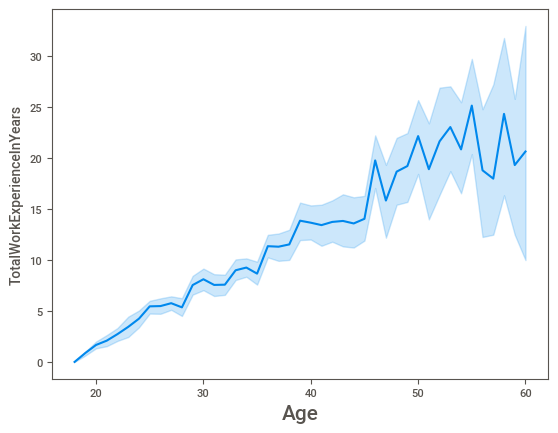

In [11]:
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('Age',fontsize=15)
plt.show()

##### Observation:

If the age in between 18 to 25 then the total year of experiance is less than 5year.
If the age is increases that time experiance also increases.

#### 2.Relation Between experiance year at this company & total work experiance



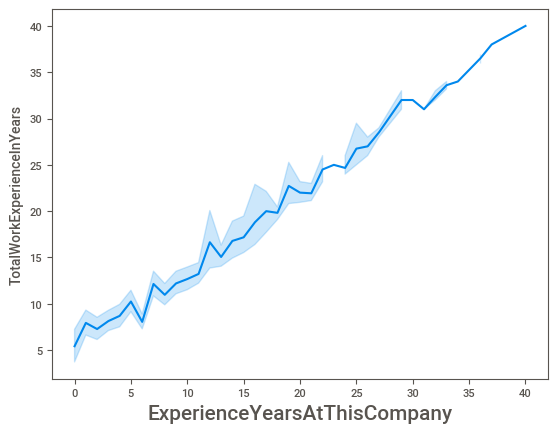

In [12]:
sns.lineplot(x='ExperienceYearsAtThisCompany',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=15)
plt.show()

##### Observation:

If he experiance year at this company that time total work experiance also increases.

#### 3.Relation between Employee last salary hike and number of company worked



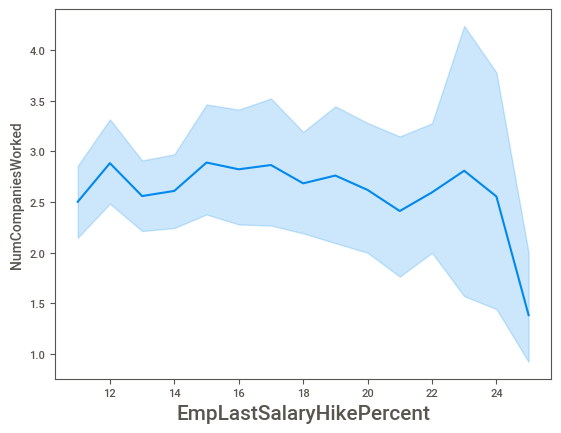

In [13]:
sns.lineplot(x='EmpLastSalaryHikePercent',y='NumCompaniesWorked',data=data)
plt.xlabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

#### Observation:

If the employee has work 1 or 2 company that time employee last salary hike percent is increases.


#### 4.Relation between Years Since Last Promotion and Experience Years In CurrentRole



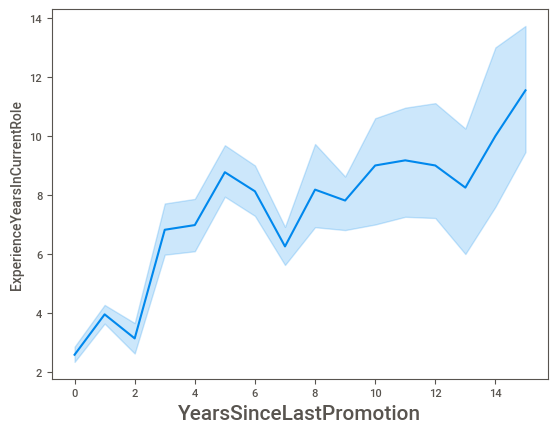

In [14]:
sns.lineplot(x='YearsSinceLastPromotion',y='ExperienceYearsInCurrentRole',data=data)
plt.xlabel('YearsSinceLastPromotion',fontsize=15)
plt.show()

##### Observation:

In above plot clearly seen that year since last promotion is increases that time employee has more experiance with current role

#### 5.Relation between Employee Hourly Rate and Years With Current Manager



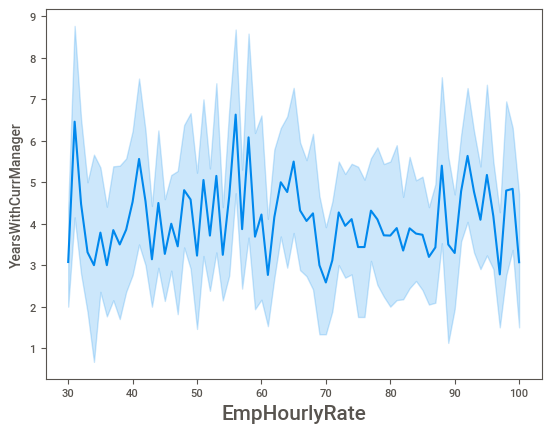

In [15]:
sns.lineplot(x='EmpHourlyRate',y='YearsWithCurrManager',data=data)
plt.xlabel('EmpHourlyRate',fontsize=15)
plt.show()

##### Observation:

most of the employee hourly rate with their current manager is constant,but some of the employees has maximum hourly rate with less no of year with current manager.

#### 6.Relation between Distance From Home and Employee Last Salary Hike Percent



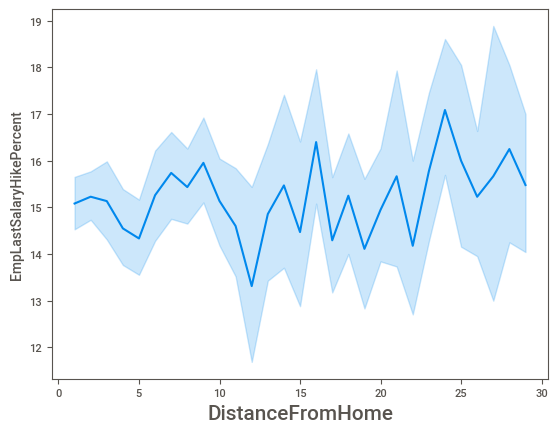

In [16]:
sns.lineplot(x='DistanceFromHome',y='EmpLastSalaryHikePercent',data=data)
plt.xlabel('DistanceFromHome',fontsize=15)
plt.show()

##### Observation:

If the distance from home is more then the employee salary hike is slightly increases.
distance from home between 10 to 13 that time employee salary hike is decreases.

## Categorical Column Anaylsis

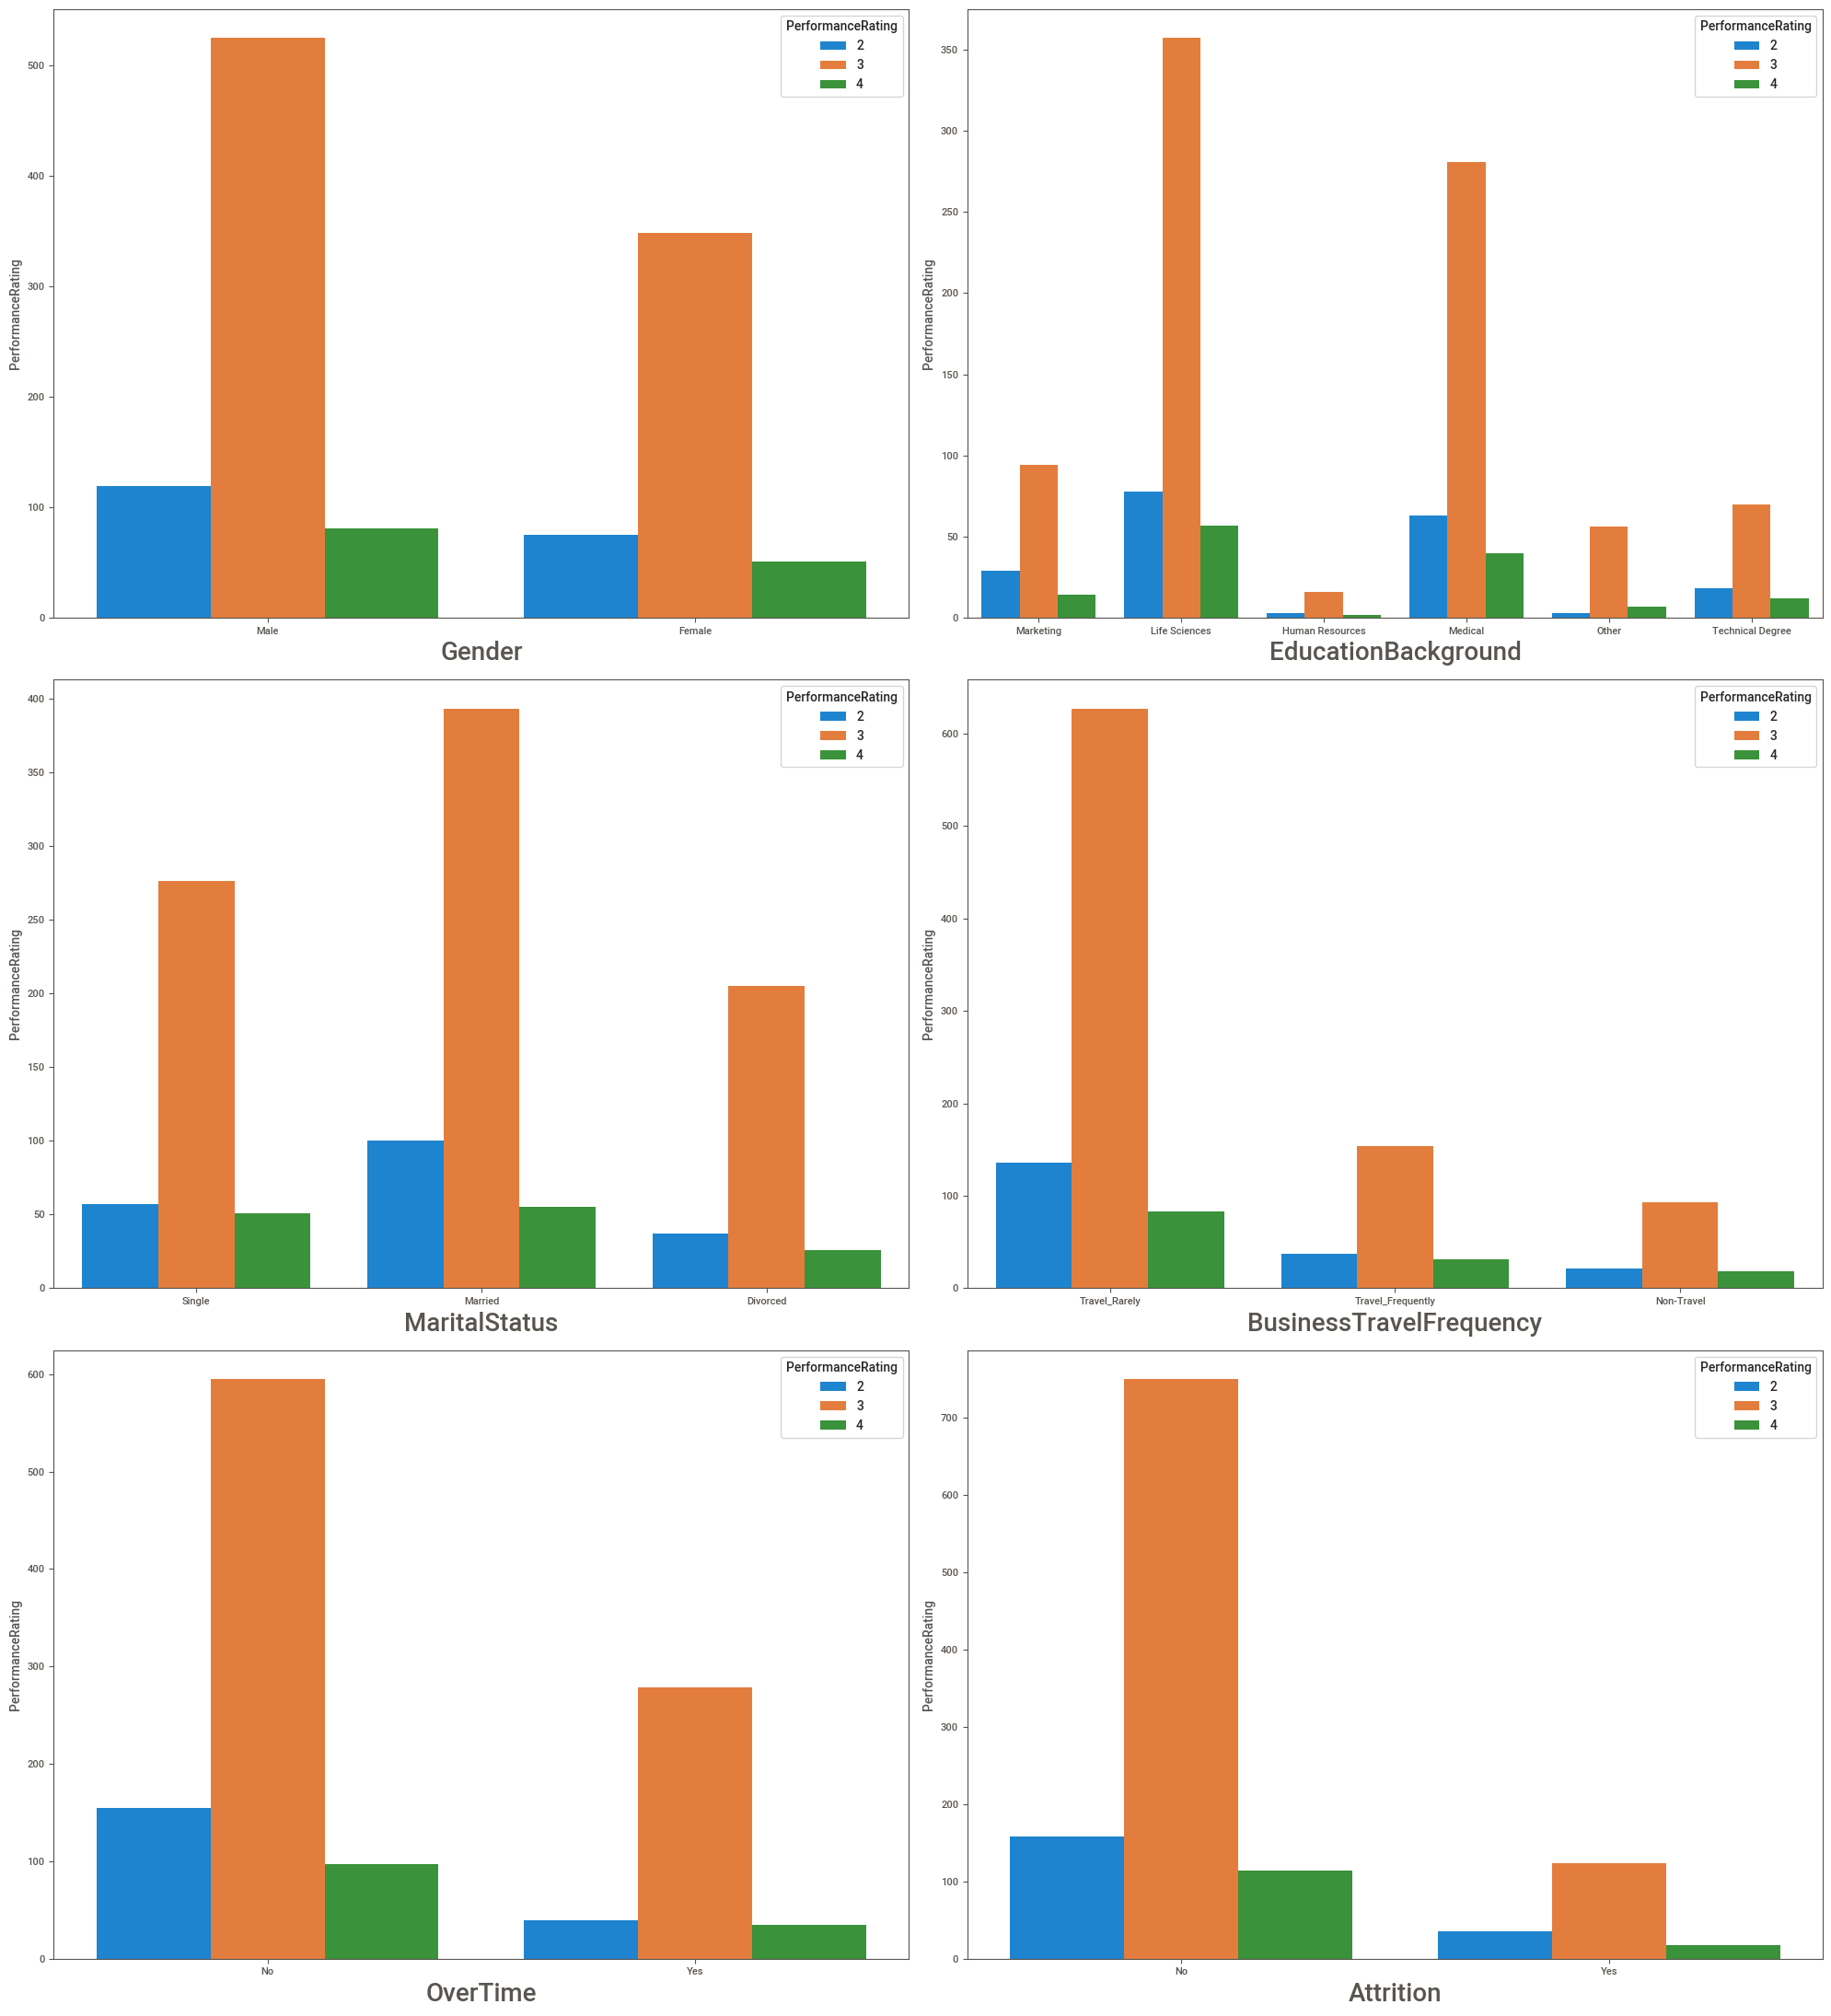

In [17]:
# Make a list of categorical feature and use sub plot to plot multiple feature
categorical_col = data[['Gender','EducationBackground','MaritalStatus','BusinessTravelFrequency','OverTime','Attrition']]
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in categorical_col: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=categorical_col[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

##### Observations:
    
7. Relationship between Gender and performance rating

Maximum no of male rated with 3 performance rating as well as in female also most of the feamle rated with 3 performance rating.
four performance rating in both male & female is less

8.Relationship between EducationBackground and performance rating

Maximum life sciences and medical education background employee rated with 3 performance rating
life science and medical education background employee also rated with 2 & 4 performance rating most of the time

9.Relationship between MaritalStatus and performance rating.

Most of the married employee rated with 3 performance rating as well as single and divorced marital status employee rated with 3 performance rating most of the time.
In married marital status 2 performance rating emplyee is more than single or divorced.

10.Relationship between Business Travel Frequency and performance rating.

Maximum no of travel rarely employee has get 3 performance rating
Those employee travel frequentaly this employee also rated with 2, 3, and 4.

11.Relationship between Overtime and performance rating.

Maximum no of employee with no overtime has rated with 3 perfomance rating
Those employee doing overtime that time 2 & 4 performance rating is constant.

12.Relationship between Attrition and performance rating.

Most of the employee rated with 3 performance rating in no means(They are not leave the company)
Those employee have 3 performace rating those also leave the company.



## Numerical Column bivaraite Analysis

In [18]:
numerical_col = []
for column in data.columns:
    if data[column].dtype == "int64":
        data[column].unique()   # for continuos features we use unique>=10
        numerical_col.append(column)

In [19]:
numerical_col  # All numerical features

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

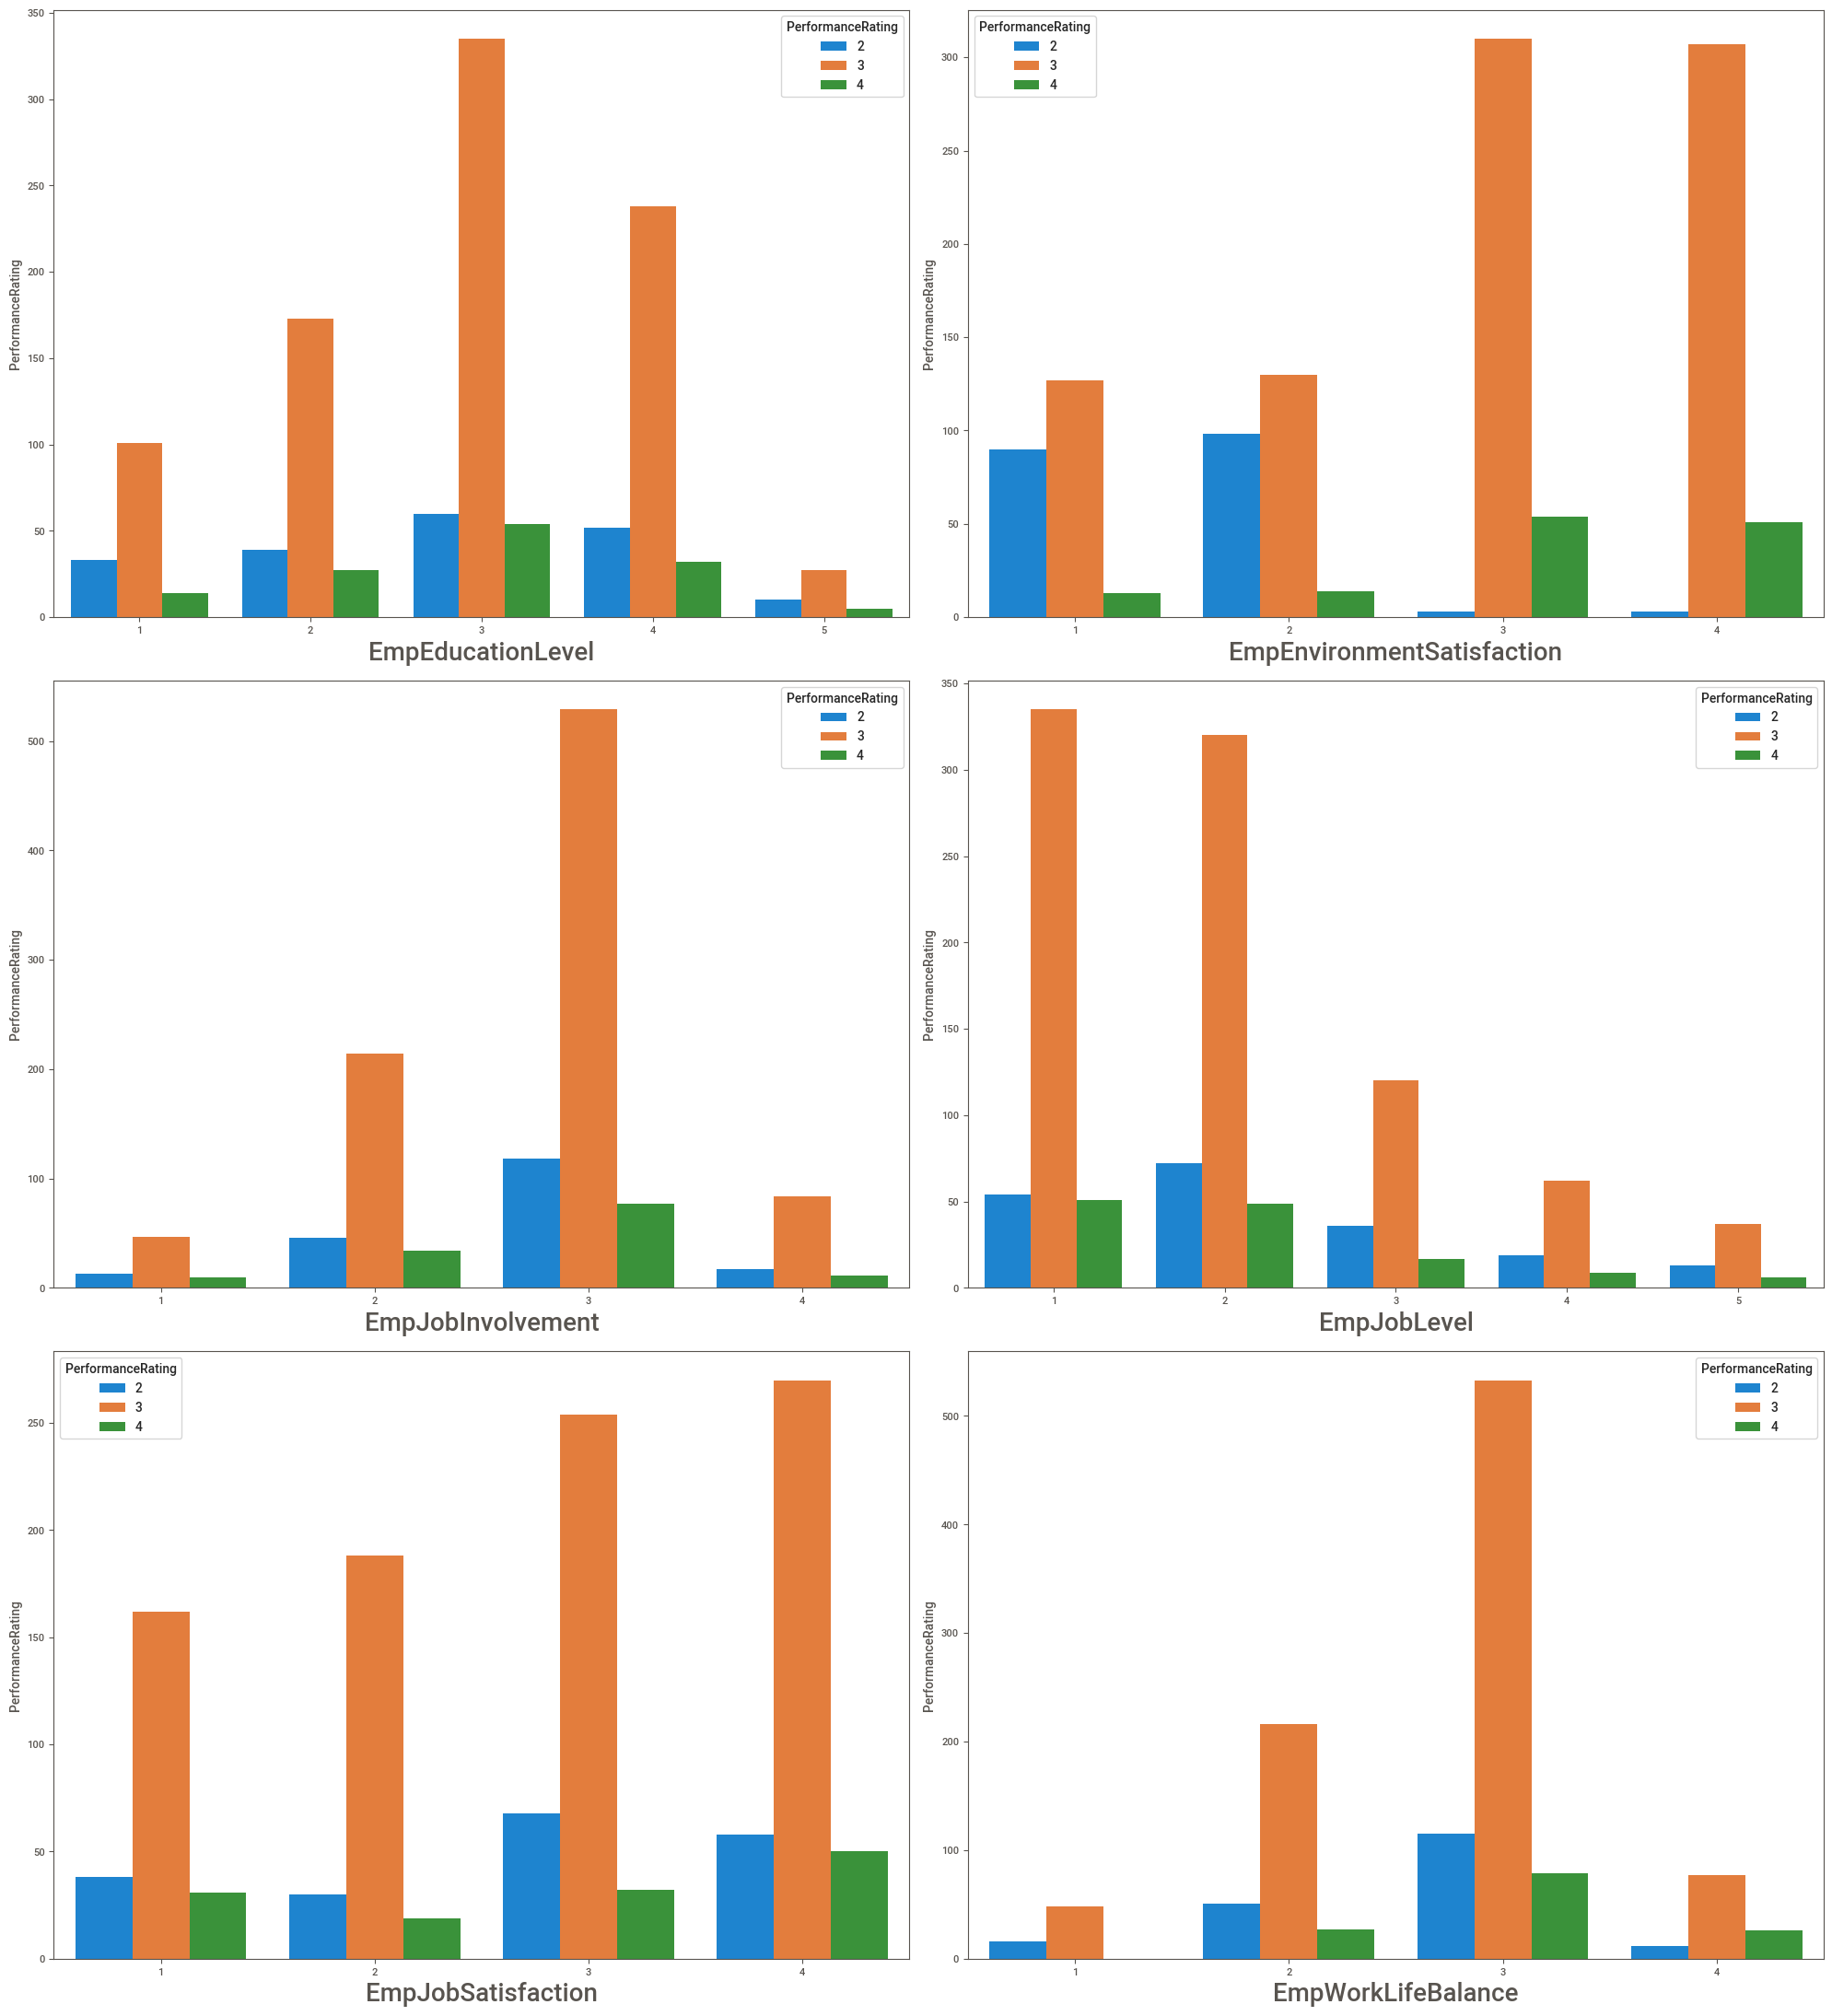

In [20]:
numerical = data[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
                 'EmpWorkLifeBalance']]

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in numerical: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=numerical[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

#### Observations:
    
15. Relationship between EmpEducationLevel and performance rating.

Those employee education level is [3,4 & 2] this employee have 3 peformance rating mostly
If the performance rating is 2 & 4 then all eduaction level employee is less than 60.

16. Relationship between EmpEnvironmentSatisfaction and performance rating.

Maximum no of employee enviorment statifaction is 3 and 4 with 3 performance rating.
If the employee enviorment satisfaction is 1 & 2 that time the maximum employee have 2 performace rating.
If the employee enviorment satisfaction is increases that time 4 performance rating also increases.

17. Relationship between EmpJobInvolvement and performance rating.

Those employee job involvement is 2 & 3 this empluee have 3 performance rating mostly
2 & 4 performance rating eployee is less in all job involvment.

18. Relationship between EmpJobLevel and performance rating.

If the employee job level is 1,2 & 3 that time most of the employee have 3 performance rating
In all job levels 2 & 4 performance rating of all emplyee is less than 60.

19. Relationship between EmpJobSatisfaction and performance rating

Maximum 4 & 3 job satisfaction employee get 3 performance rating most of the time.
In all job satisfaction 2 & 4 performance rating is less than 55 employee.

21. Relationship between EmpWorkLifeBalance and performance rating.

If the employee work life balance is 3 that time maximum no of employee have 3 performance rating.
If the work life balance is 1 that time no one get 4 performance rating.

## Multivairate Analysis

#### 1.Check the relationship between Age & Total work experiance with respect to target feature



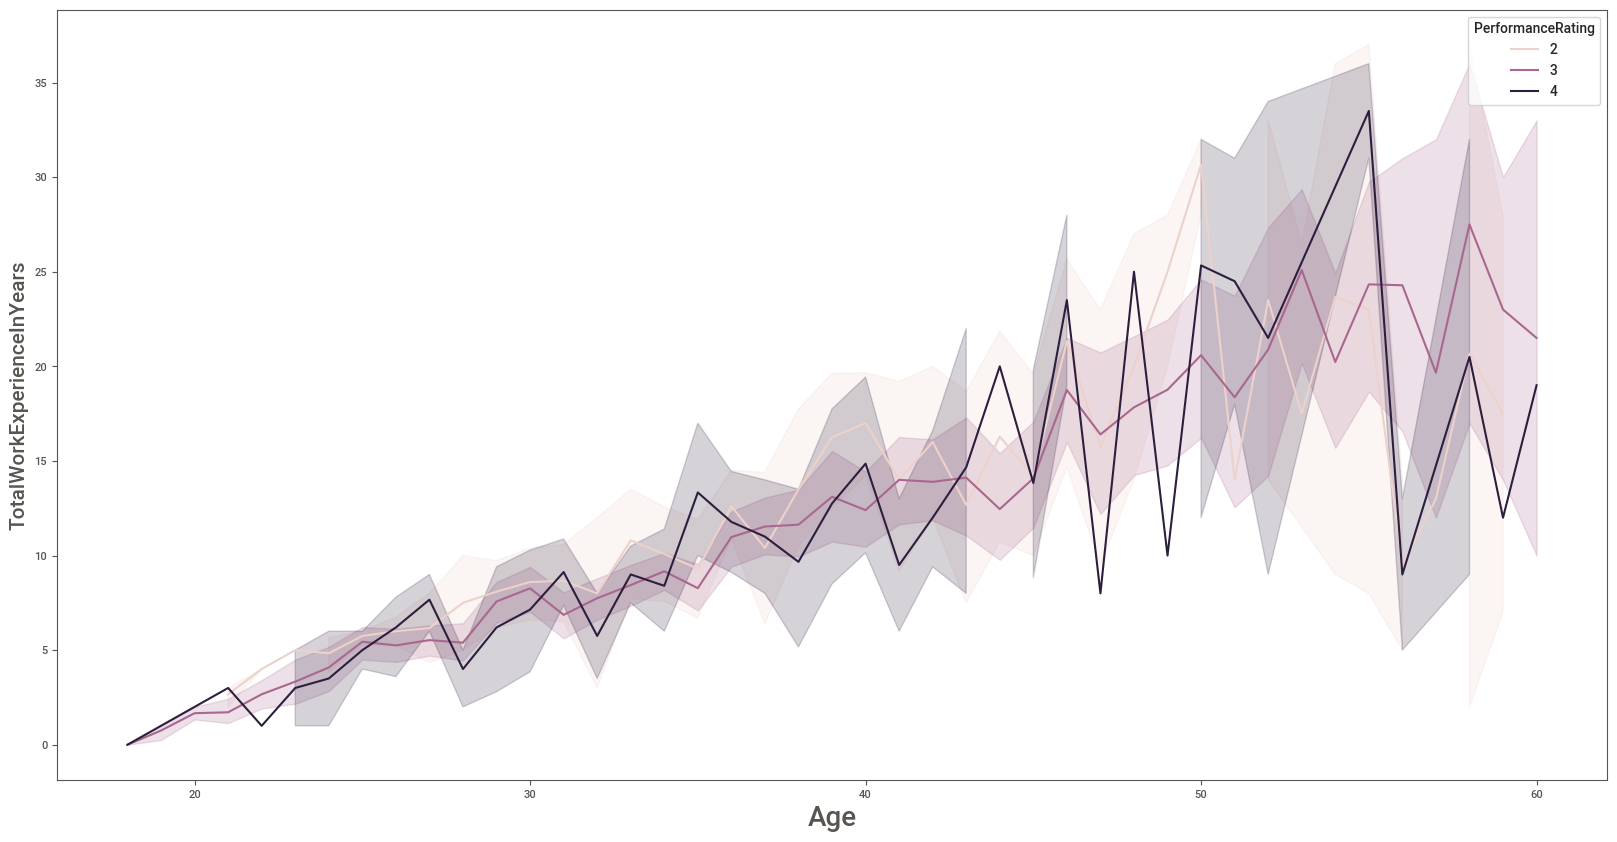

In [21]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',hue=data.PerformanceRating,data=data)
plt.xlabel('Age',fontsize=20)
plt.ylabel('TotalWorkExperienceInYears',fontsize=15)
plt.show()

##### Observation:

If the age & total experiance is increases that time most of the employee performance rating is 4.
Low age and minimum year experiance employee also 4 perfomace rating.
At the age of 50 and 30 years of experiance employee have 2 performance rating.

##### 2.Check the relationship between Gender & Number Companies Worked with respect to target feature

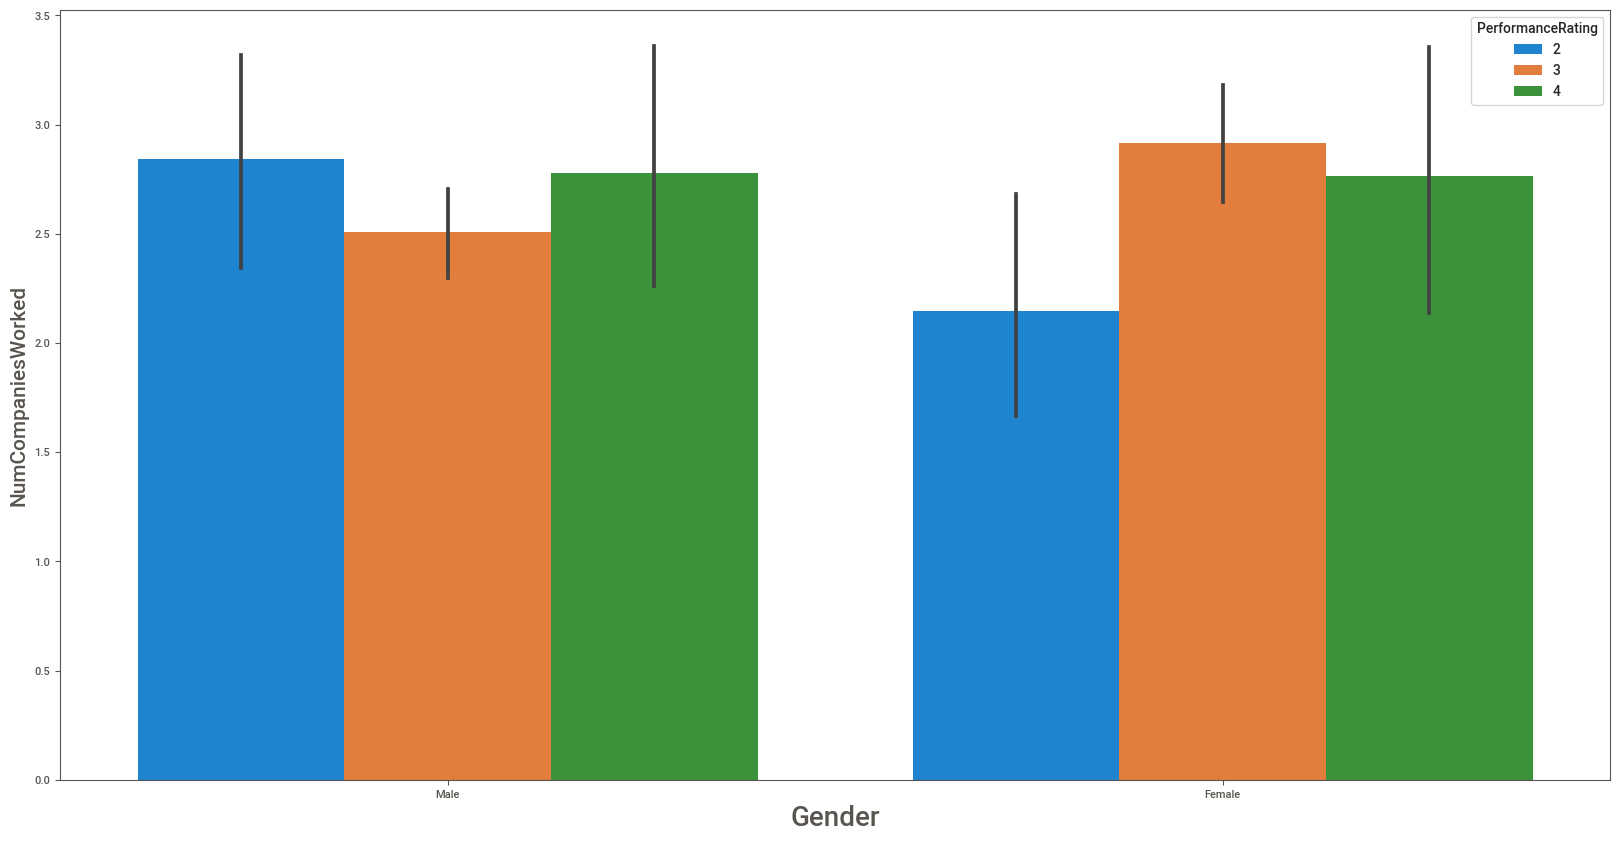

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

##### Observation:

If the gender is male and no of companies work is increses that time most of the performance rating is 2 & 4.
If female work in less no companies that time performance rating is 2.
3 & 4 performance rating in female increase if the no of compaines worked is increses.

#### 3.Check the relationship between MaritalStatus & EmpLastSalaryHikePercent with respect to target feature

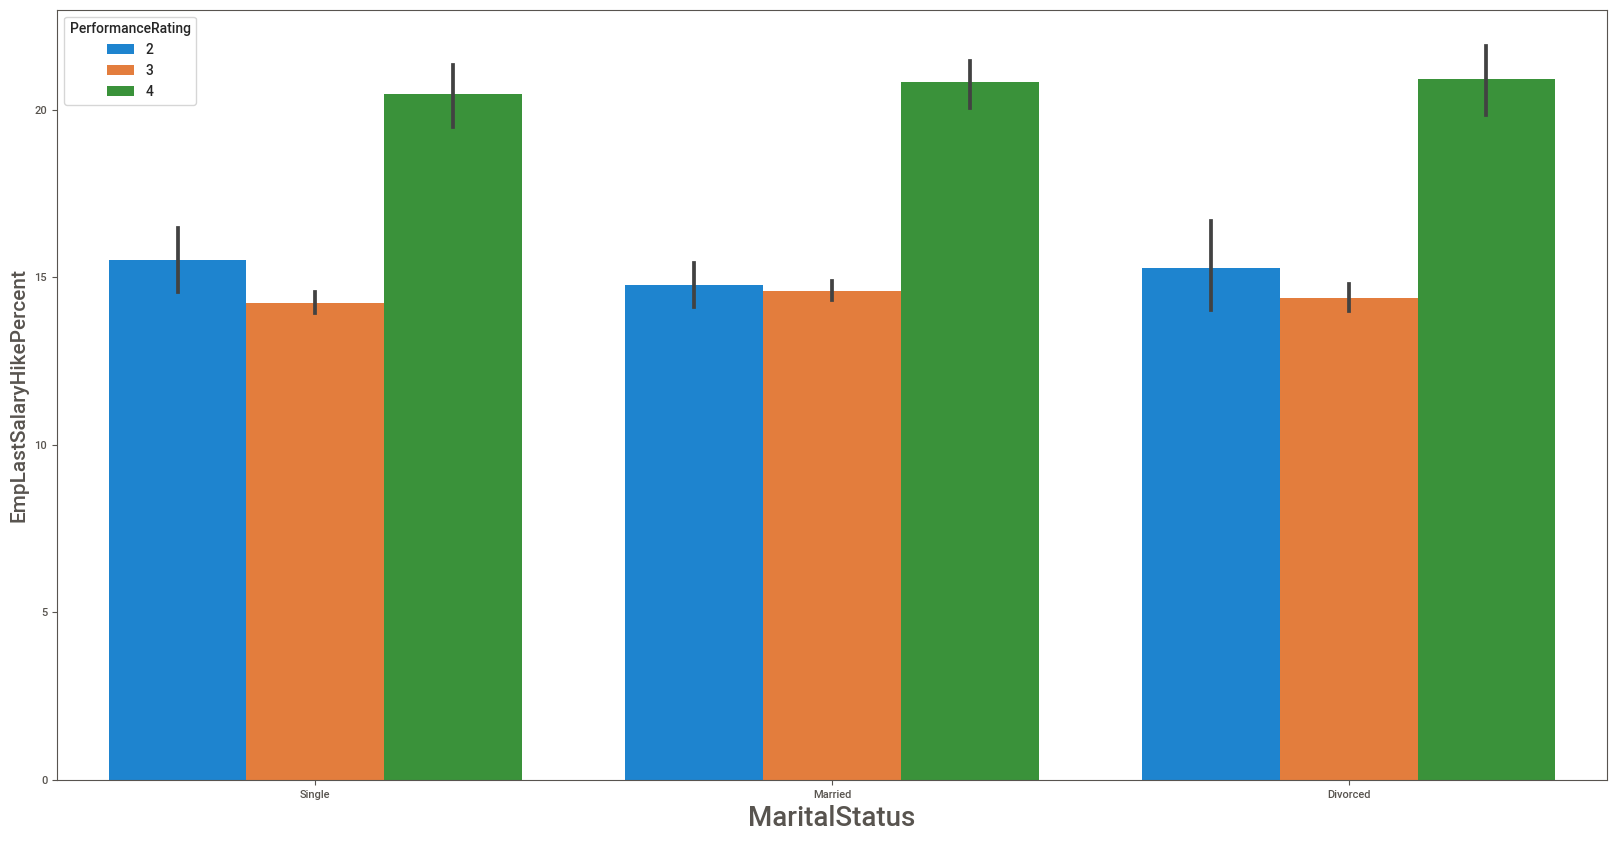

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x='MaritalStatus',y='EmpLastSalaryHikePercent',hue=data.PerformanceRating,data=data)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

##### Observatopn:

In all marital status with maximum salary hike percent in last year is increases that time performance rating is 4.
If salary hike percentage in last year is less than 15 that time performance rating is 2 & 3 in all marital status.

#### 4.Check the relationship between BusinessTravelFrequency & EmpEnvironmentSatisfaction with respect to target feature

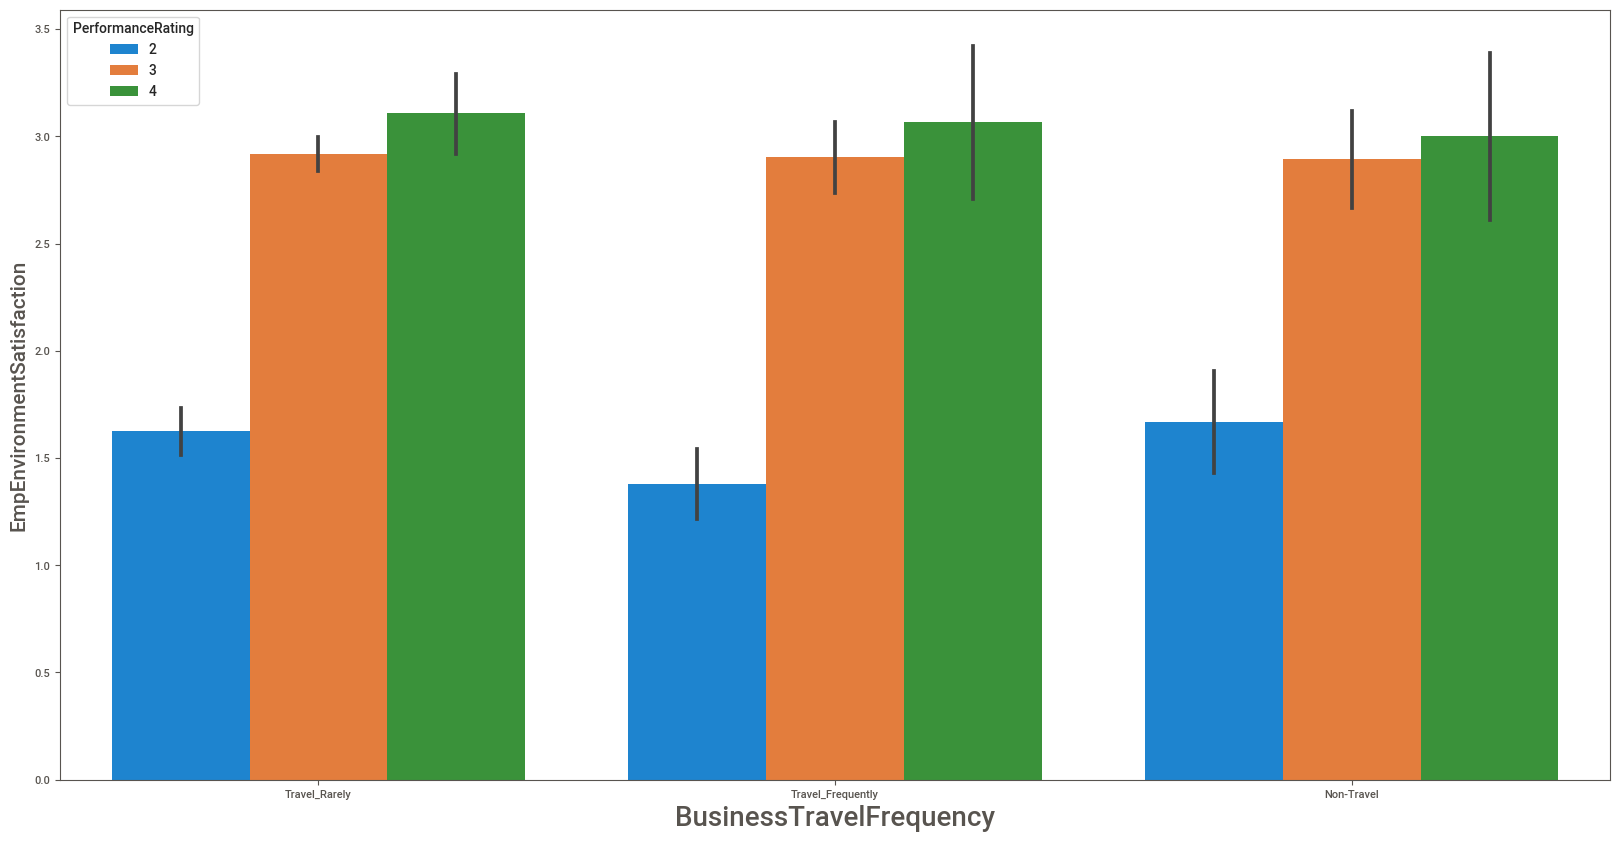

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(x='BusinessTravelFrequency',y='EmpEnvironmentSatisfaction',hue=data.PerformanceRating,data=data)
plt.xlabel('BusinessTravelFrequency',fontsize=20)
plt.ylabel('EmpEnvironmentSatisfaction',fontsize=15)
plt.show()

##### Observation:

If emplyee number of companies worked is increses that time most of the employee leave the company and their performance rating is 2
Those employee have work in less no of companies they are not leave the company and their performance rating is constant.

#### 5.Check the relationship between Attrition & YearsWithCurrManager with respect to target feature

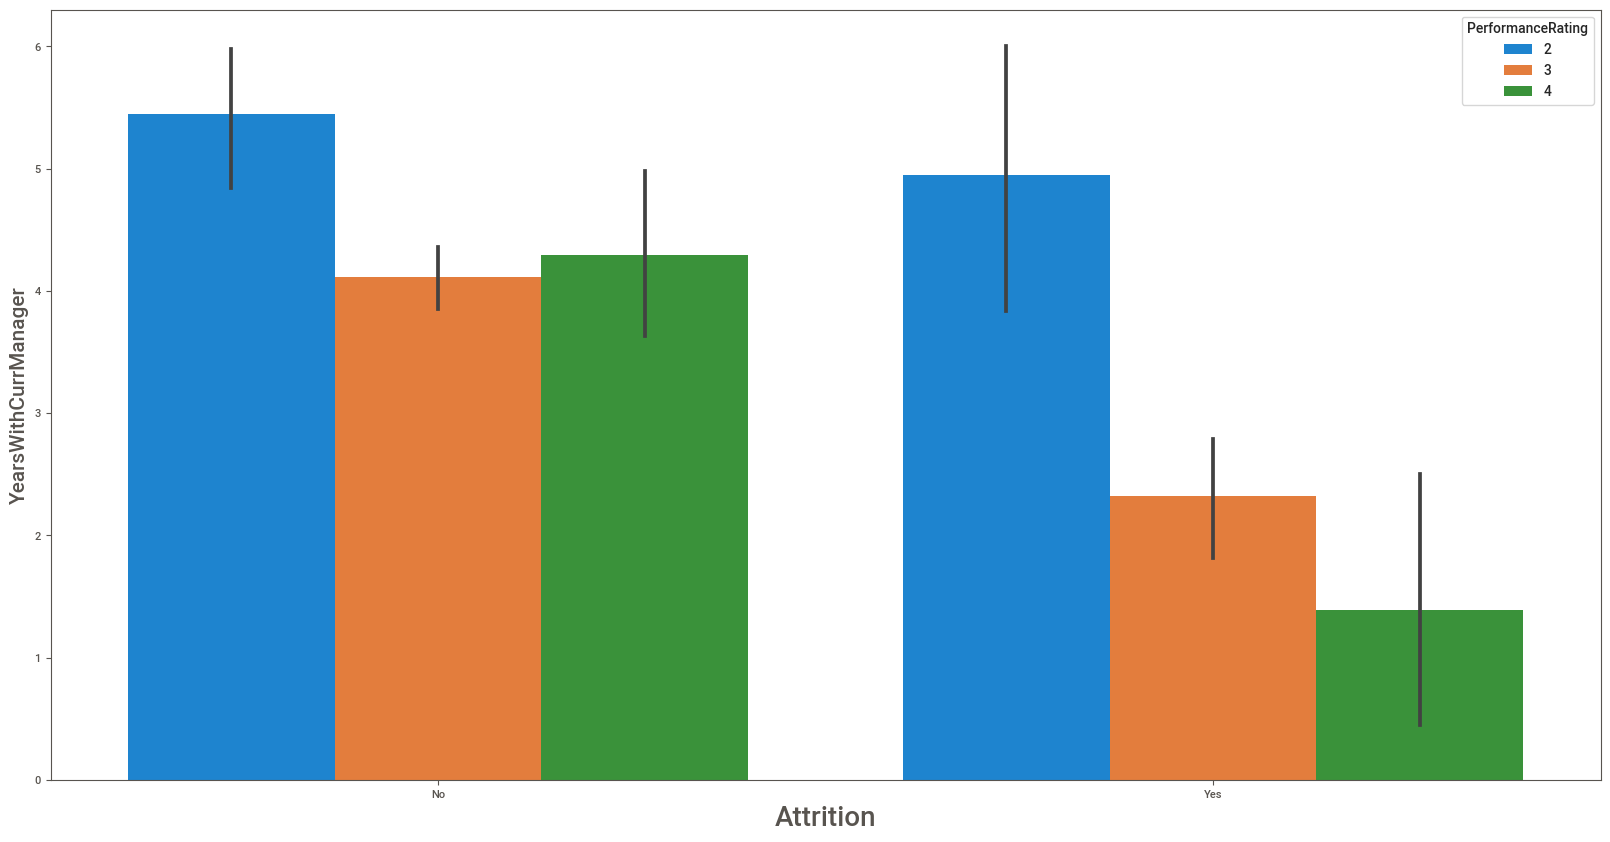

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='YearsWithCurrManager',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('YearsWithCurrManager',fontsize=15)
plt.show()

##### Observation:

If the employee current manager year is increses that time performance rating is 2 and 50-50% chances of employee to leave the company.
those employee perfomance rating is 4 and current manger year is increases that time most of the employee not leave the company.

#### 6.Check the relationship between EducationBackground & ExperienceYearsInCurrentRole with respect to target feature

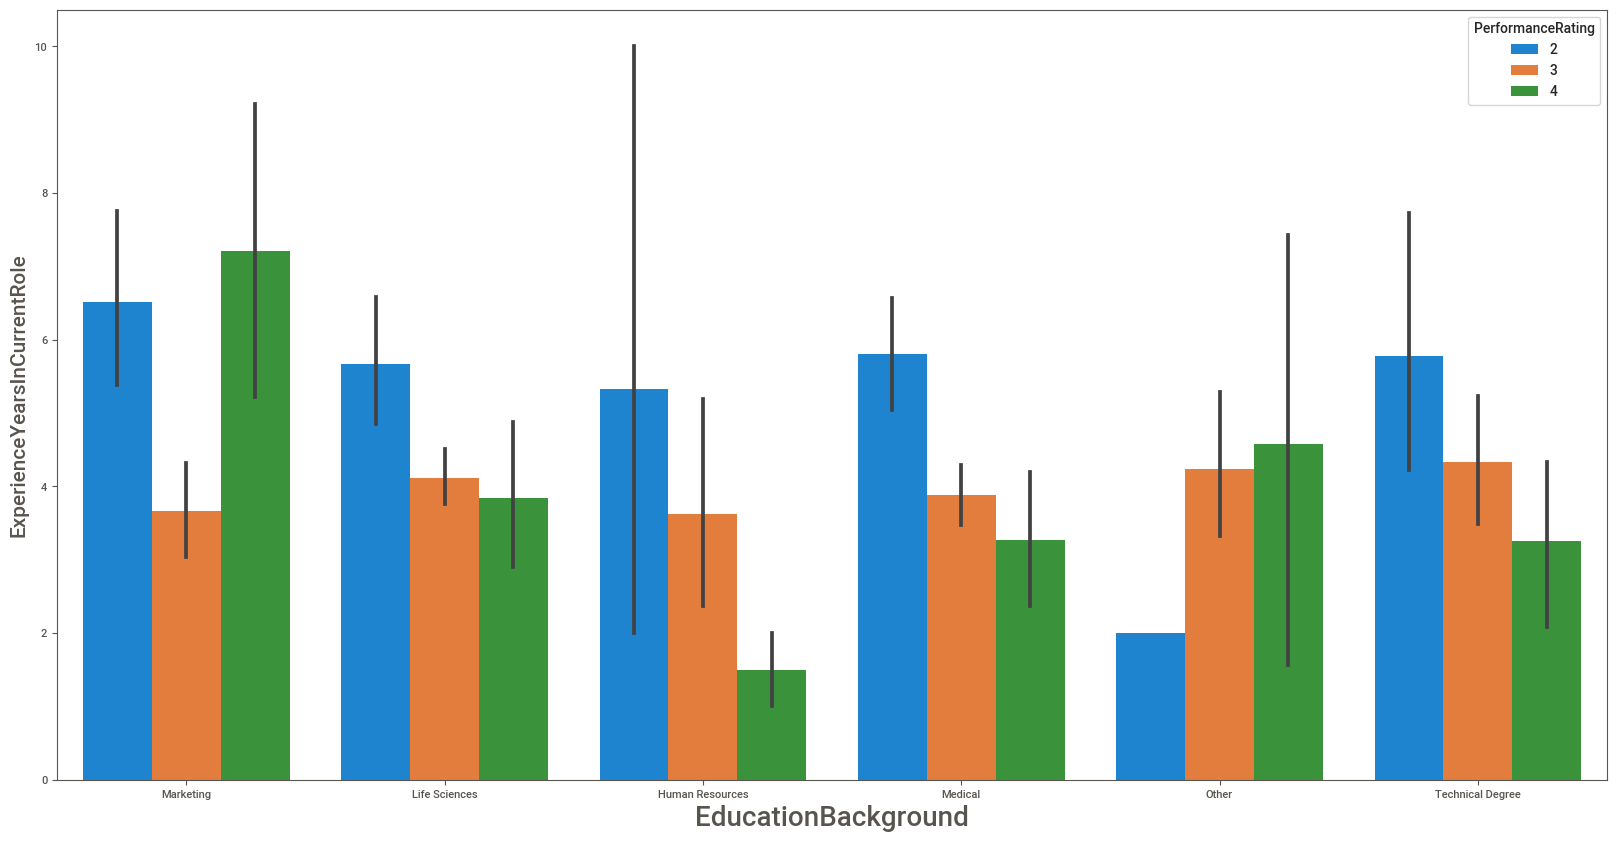

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x='EducationBackground',y='ExperienceYearsInCurrentRole',hue=data.PerformanceRating,data=data)
plt.xlabel('EducationBackground',fontsize=20)
plt.ylabel('ExperienceYearsInCurrentRole',fontsize=15)
plt.show()

##### Observation:

If the current role experiance is increses of marketing education background employee has 4 performance rating most of the time
In all education background with current role experiance is more than 5 then the performance rating of employee is 2.
Life scineces, Medical, others , and technical degree education background employee has less than 4 year of experiance in current role that time performance rating is 3 & 4.

#### 7.Check the relationship between OverTime & DistanceFromHome with respect to target feature



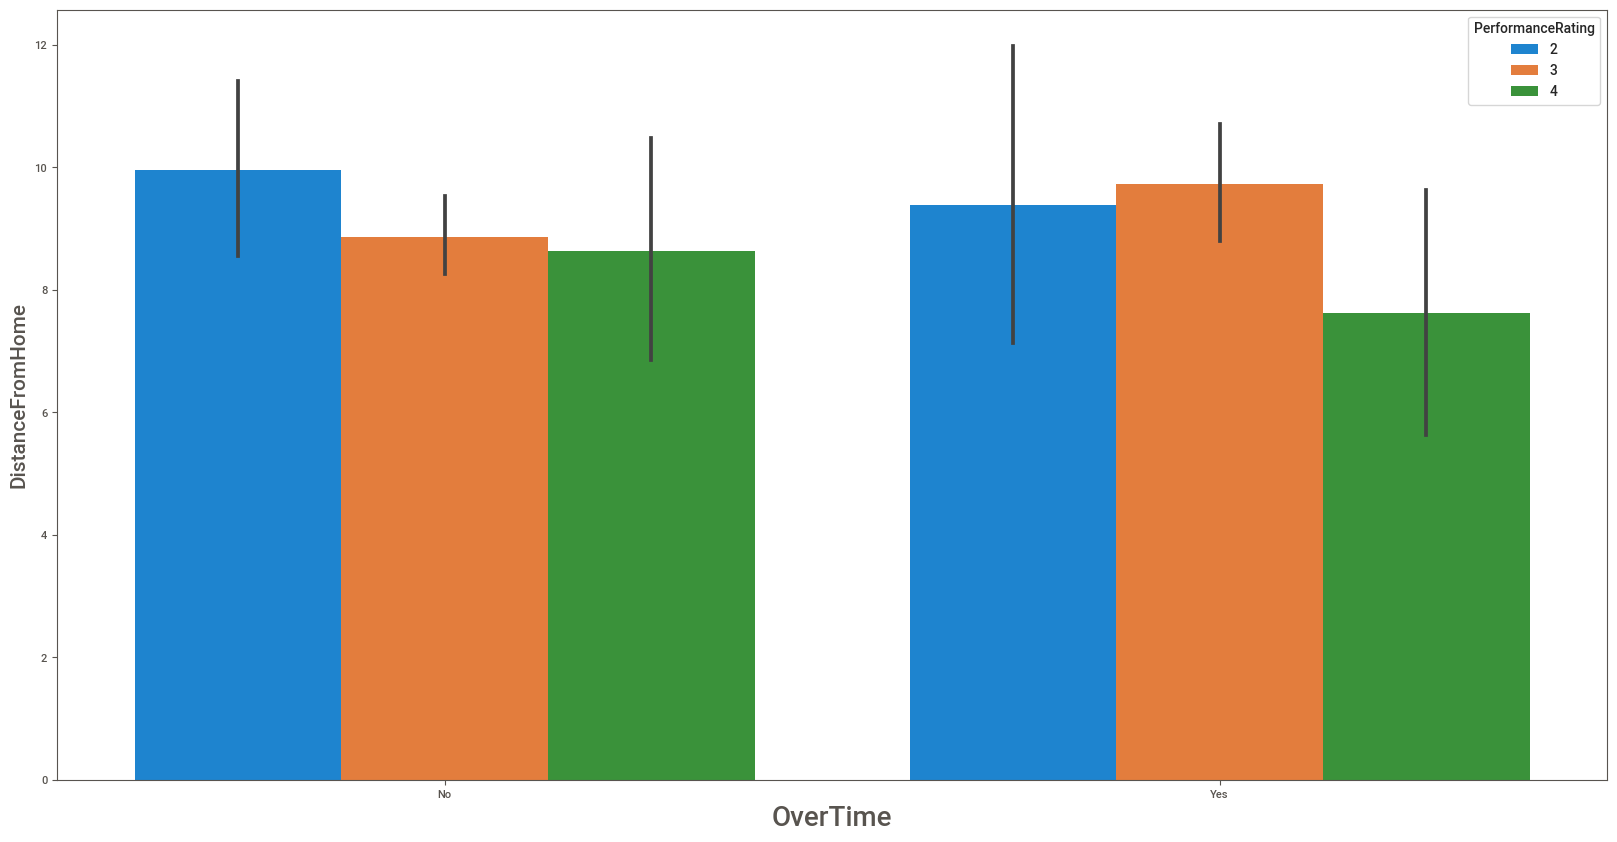

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='OverTime',y='DistanceFromHome',hue=data.PerformanceRating,data=data)
plt.xlabel('OverTime',fontsize=20)
plt.ylabel('DistanceFromHome',fontsize=15)
plt.show()

##### Observation:

If the distance from home is increses that time performance rating is constant with employee doing overtime as well as not doing overtime.

#### 8.Check the relationship between EmpDepartment & TrainingTimesLastYear with respect to target feature

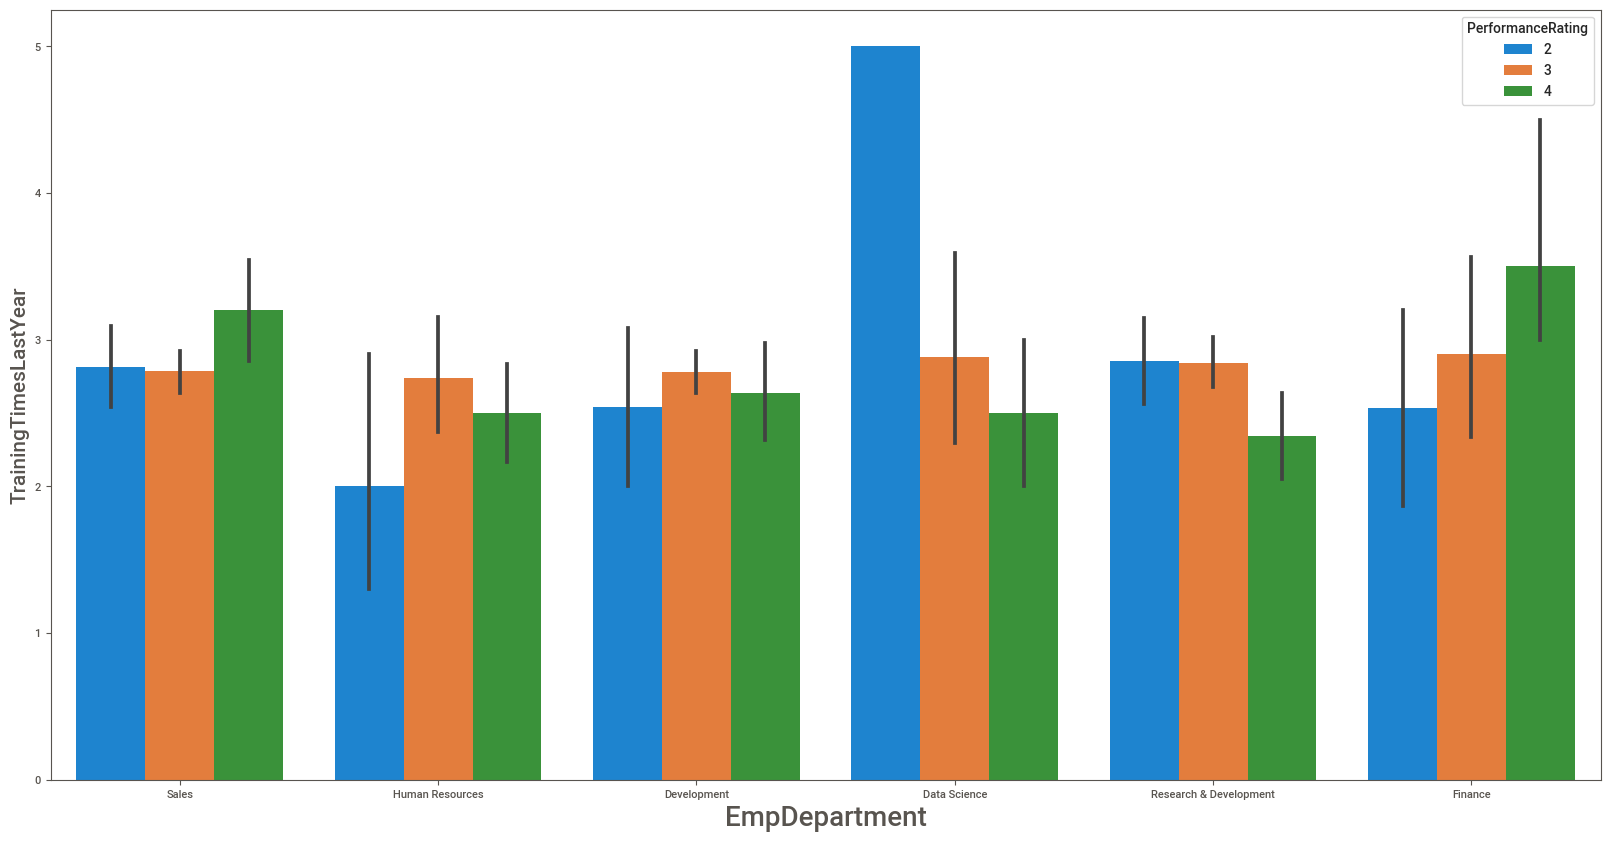

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x='EmpDepartment',y='TrainingTimesLastYear',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('TrainingTimesLastYear',fontsize=15)
plt.show()

##### Observation:

If the employee from data science department and most training time in last year then the performance rating is 2 maximum time.
Other all employee department with less than 3 time training in last year then the peroformance rating is constant.

#### 10.Check the relationship between Attrition & NumCompaniesWorked with respect to target feature



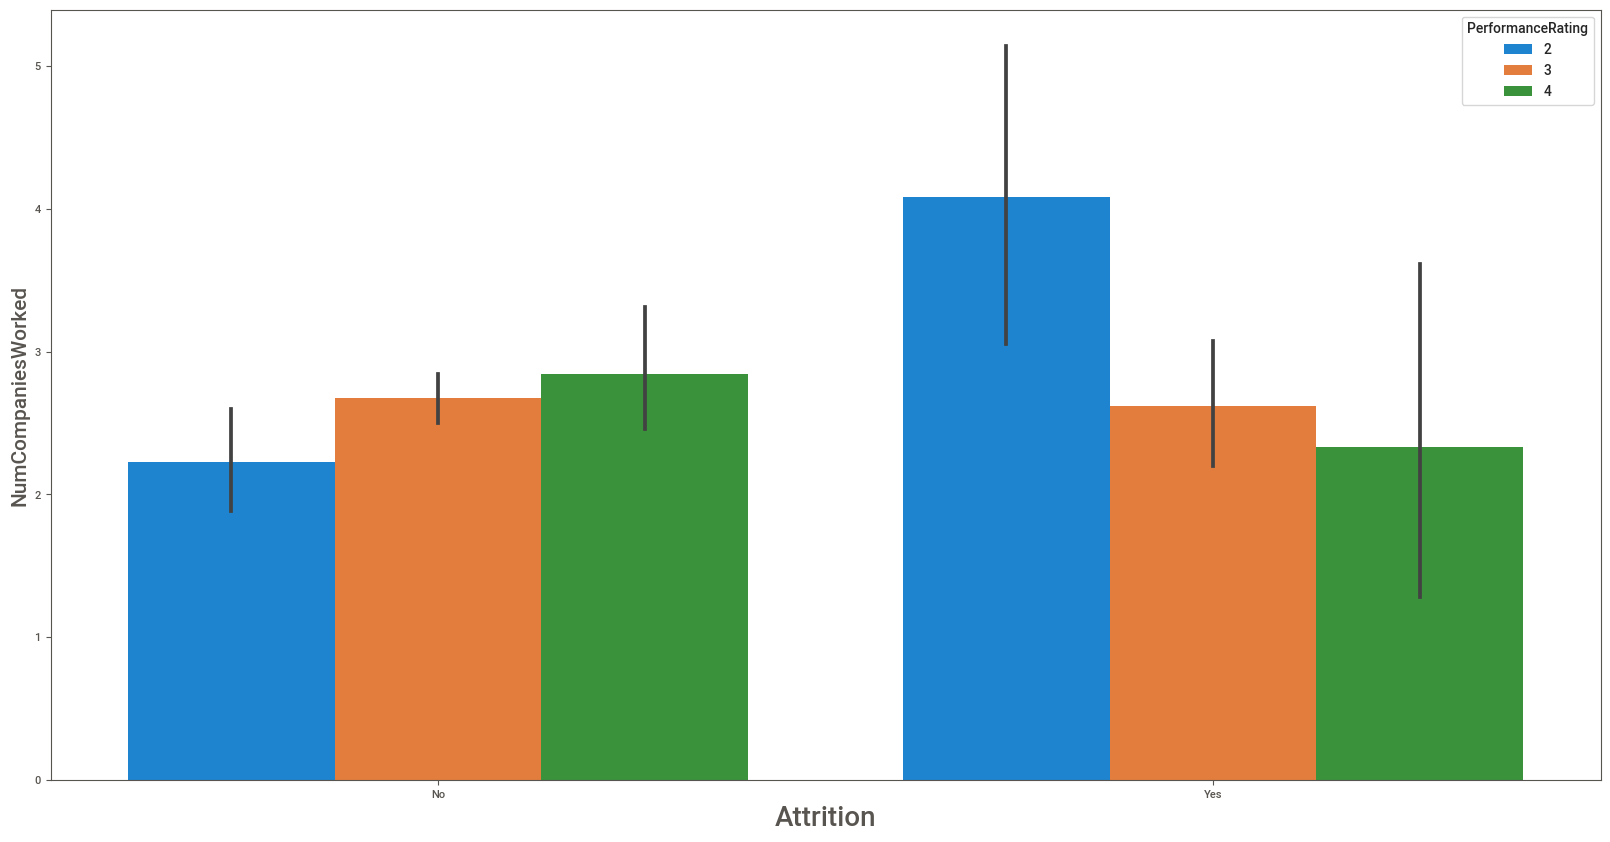

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

##### Observation:

If emplyee number of companies worked is increses that time most of the employee leave the company and their performance rating is 2
Those employee have work in less no of companies they are not leave the company and their performance rating is constant.

# DEPARTMENT WISE PERFORMANCE RATING


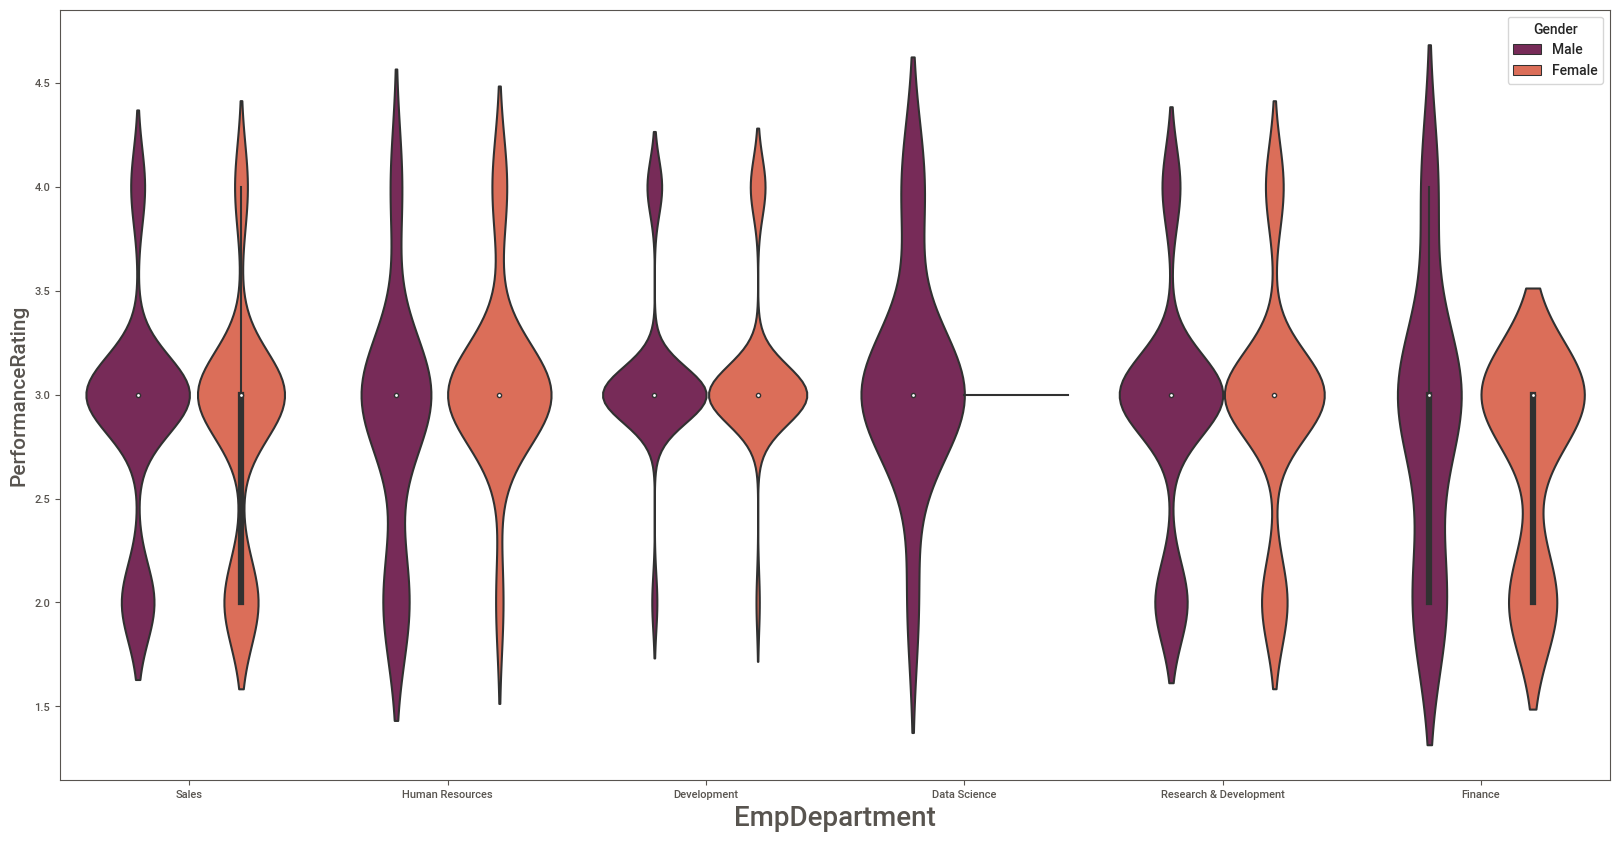

In [30]:
plt.figure(figsize=(20,10),facecolor='white')
sns.violinplot(x='EmpDepartment',y='PerformanceRating',hue=data.Gender,data=data,palette='rocket')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

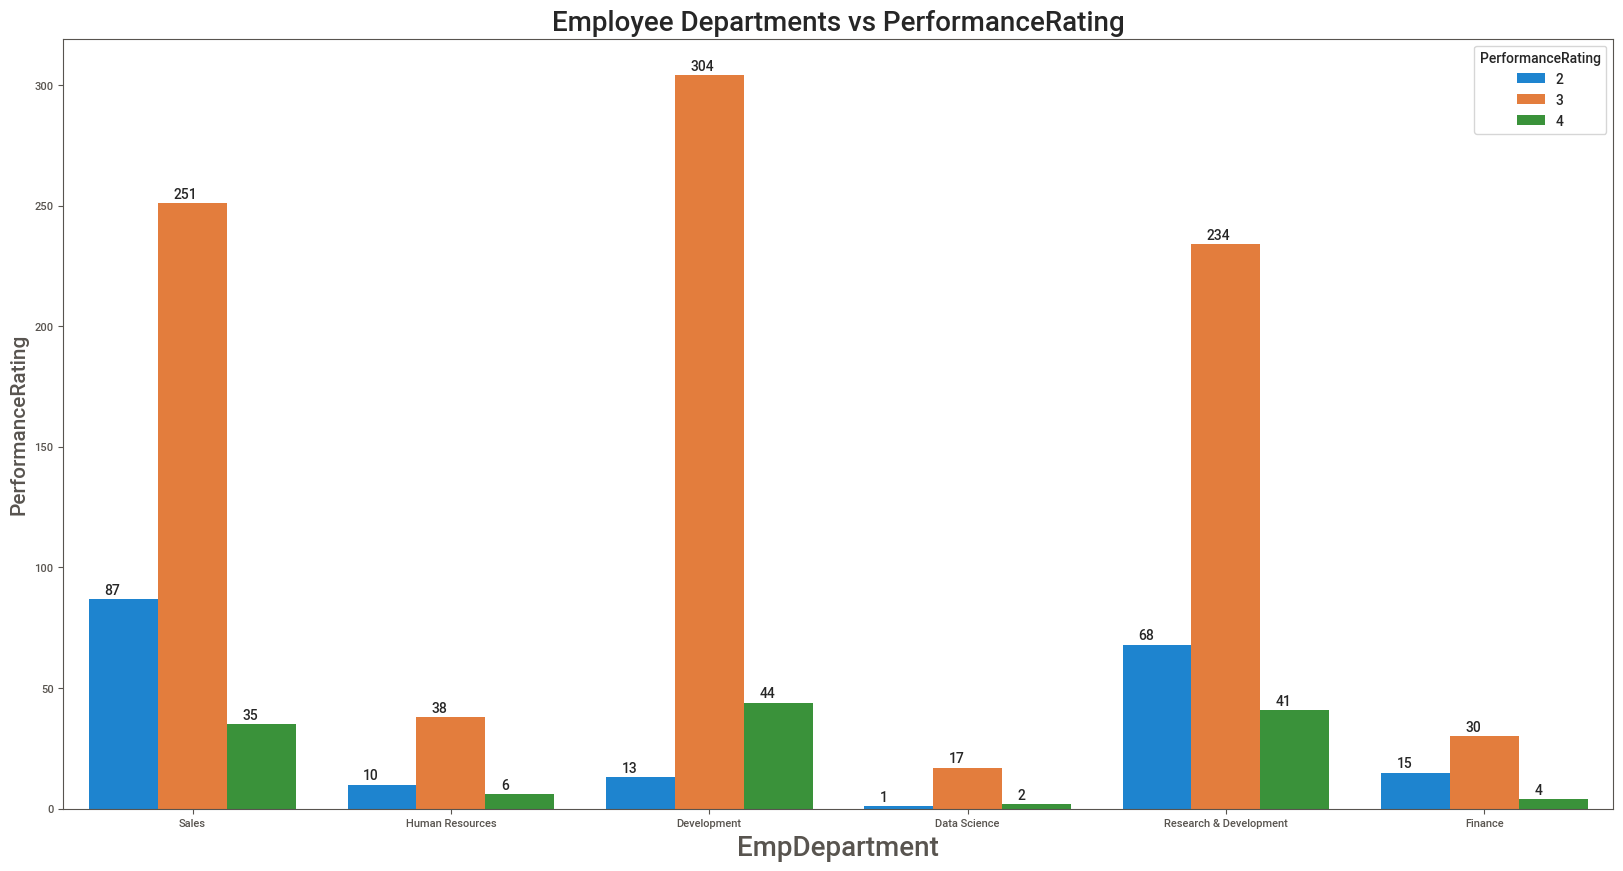

In [31]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

##### Observation:

From the above graph we can conclude that from the EmpDepartment Development department is showing High performance rating

Sales: The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female.

Human Resources: The majority of the employees lying under the level 3 performance . The older people are performing low in this department. The female employees in HR department doing really well in their performance.

Development: The maximum number of employees are level 3 performers. Employees of all age are performing at the level of 3 only. The gender-based performance is nearly same for both.

Data Science: The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers. The overall performance is higher compared to all departments. Male employees are doing good in this department.

Research & Development: The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.

Finance: The finance department performance is exponentially decreasing when age increases. The male employees are doing good. The experience factor is inversely relating to the performance level.



## PERCENT COUNT IN EMPLOYEE DEPARTMENT WITH PERFORMANCE RATING


In [32]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


## TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE


#### From visualisation file we get the top 3 factor affecting to the employee performance



#### 1.Emp Environment Satisfactio


#### 2.Emp Last Salary Hike Percent

#### 3.Emp Work Life Balance

([<matplotlib.patches.Wedge at 0x275eec13cd0>,
 [Text(-0.16655037748057508, 0.22507992305196375, '1'),
  Text(-0.2673330255758655, -0.0832649592352847, '2'),
  Text(0.08954015707164271, -0.2652971169680996, '3'),
  Text(0.22109354771524295, 0.17180699391668425, '4')],
 [Text(-0.2914631605910064, 0.39388986534093656, '19.2%'),
  Text(-0.4678327947577646, -0.1457136786617482, '20.2%'),
  Text(0.15669527487537477, -0.4642699546941743, '30.6%'),
  Text(0.3869137085016751, 0.3006622393541974, '30.1%')])

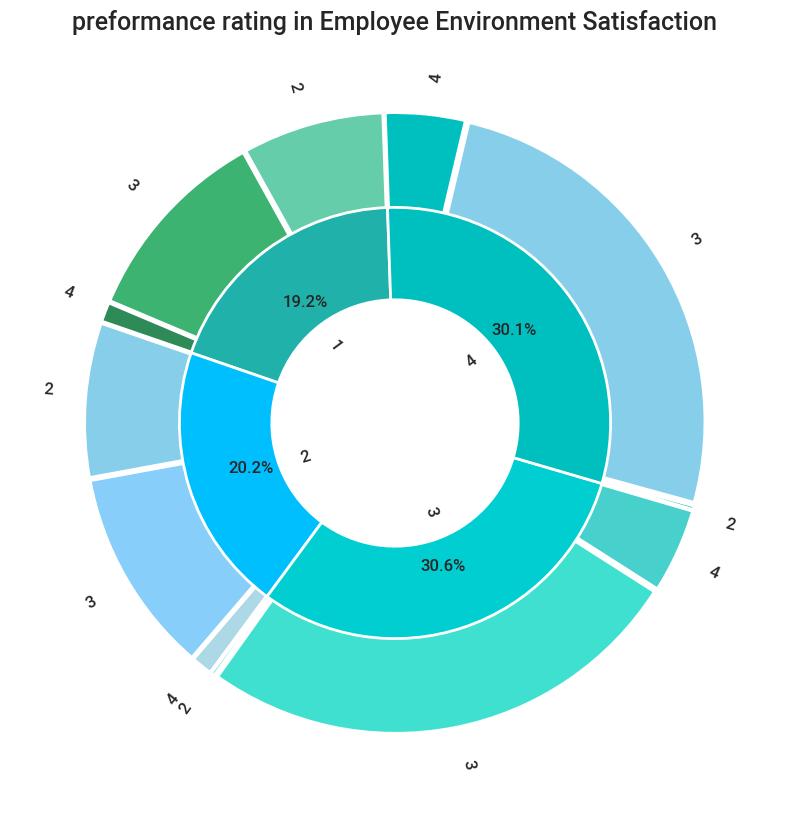

In [33]:
# 1.Employee enviorment Satisfaction
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("preformance rating in Employee Environment Satisfaction",fontsize=18)
plt.pie([90,127,13,98,130,14,3,310,54,3,307,51], radius=1,
        colors=["mediumaquamarine","mediumseagreen","seagreen",
                "skyblue","lightskyblue",'lightblue',
                'turquoise','turquoise','mediumturquoise',
                'c','skyblue','c',
               ],explode =[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
        labels=[2,3,4,2,3,4,2,3,4,2,3,4],rotatelabels=True,
        pctdistance=0.82, textprops = {"fontsize":12,"fontweight":"bold"},startangle=92,
        wedgeprops=dict(width=0.6, edgecolor='w',linewidth=3))

plt.pie([230,242,367,361], radius=0.7,
        colors=['lightseagreen','deepskyblue',"darkturquoise","c"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=2),textprops = {"fontsize":12,"fontweight":"bold"},
        autopct='%.1f%%',
        labels=[1,2,3,4],
        pctdistance=0.70, labeldistance=0.4, rotatelabels=True,startangle=92)

In [34]:
# 2.Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


In [35]:
# 3.Employee Work life balance
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpWorkLifeBalance,,,,
1,16,48,0,64
2,51,216,27,294
3,115,533,79,727
4,12,77,26,115
All,194,874,132,1200


##### Observation:

1.Employee Enviroment satisfaction:

Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.
2.Employee last salary hike percent:

More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time.
Employees whose salary hike percentage is in between 20-22%, There performance rating is 4
3.Employee work life balance:

In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employee

### CHECKING THE DISTRIBUTION OF CONTINUOUS FEATURE


##### Those feature continuous in nature only use this feature to plot a distribution


In [36]:
# Get the continuous features
data.select_dtypes('int64').head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


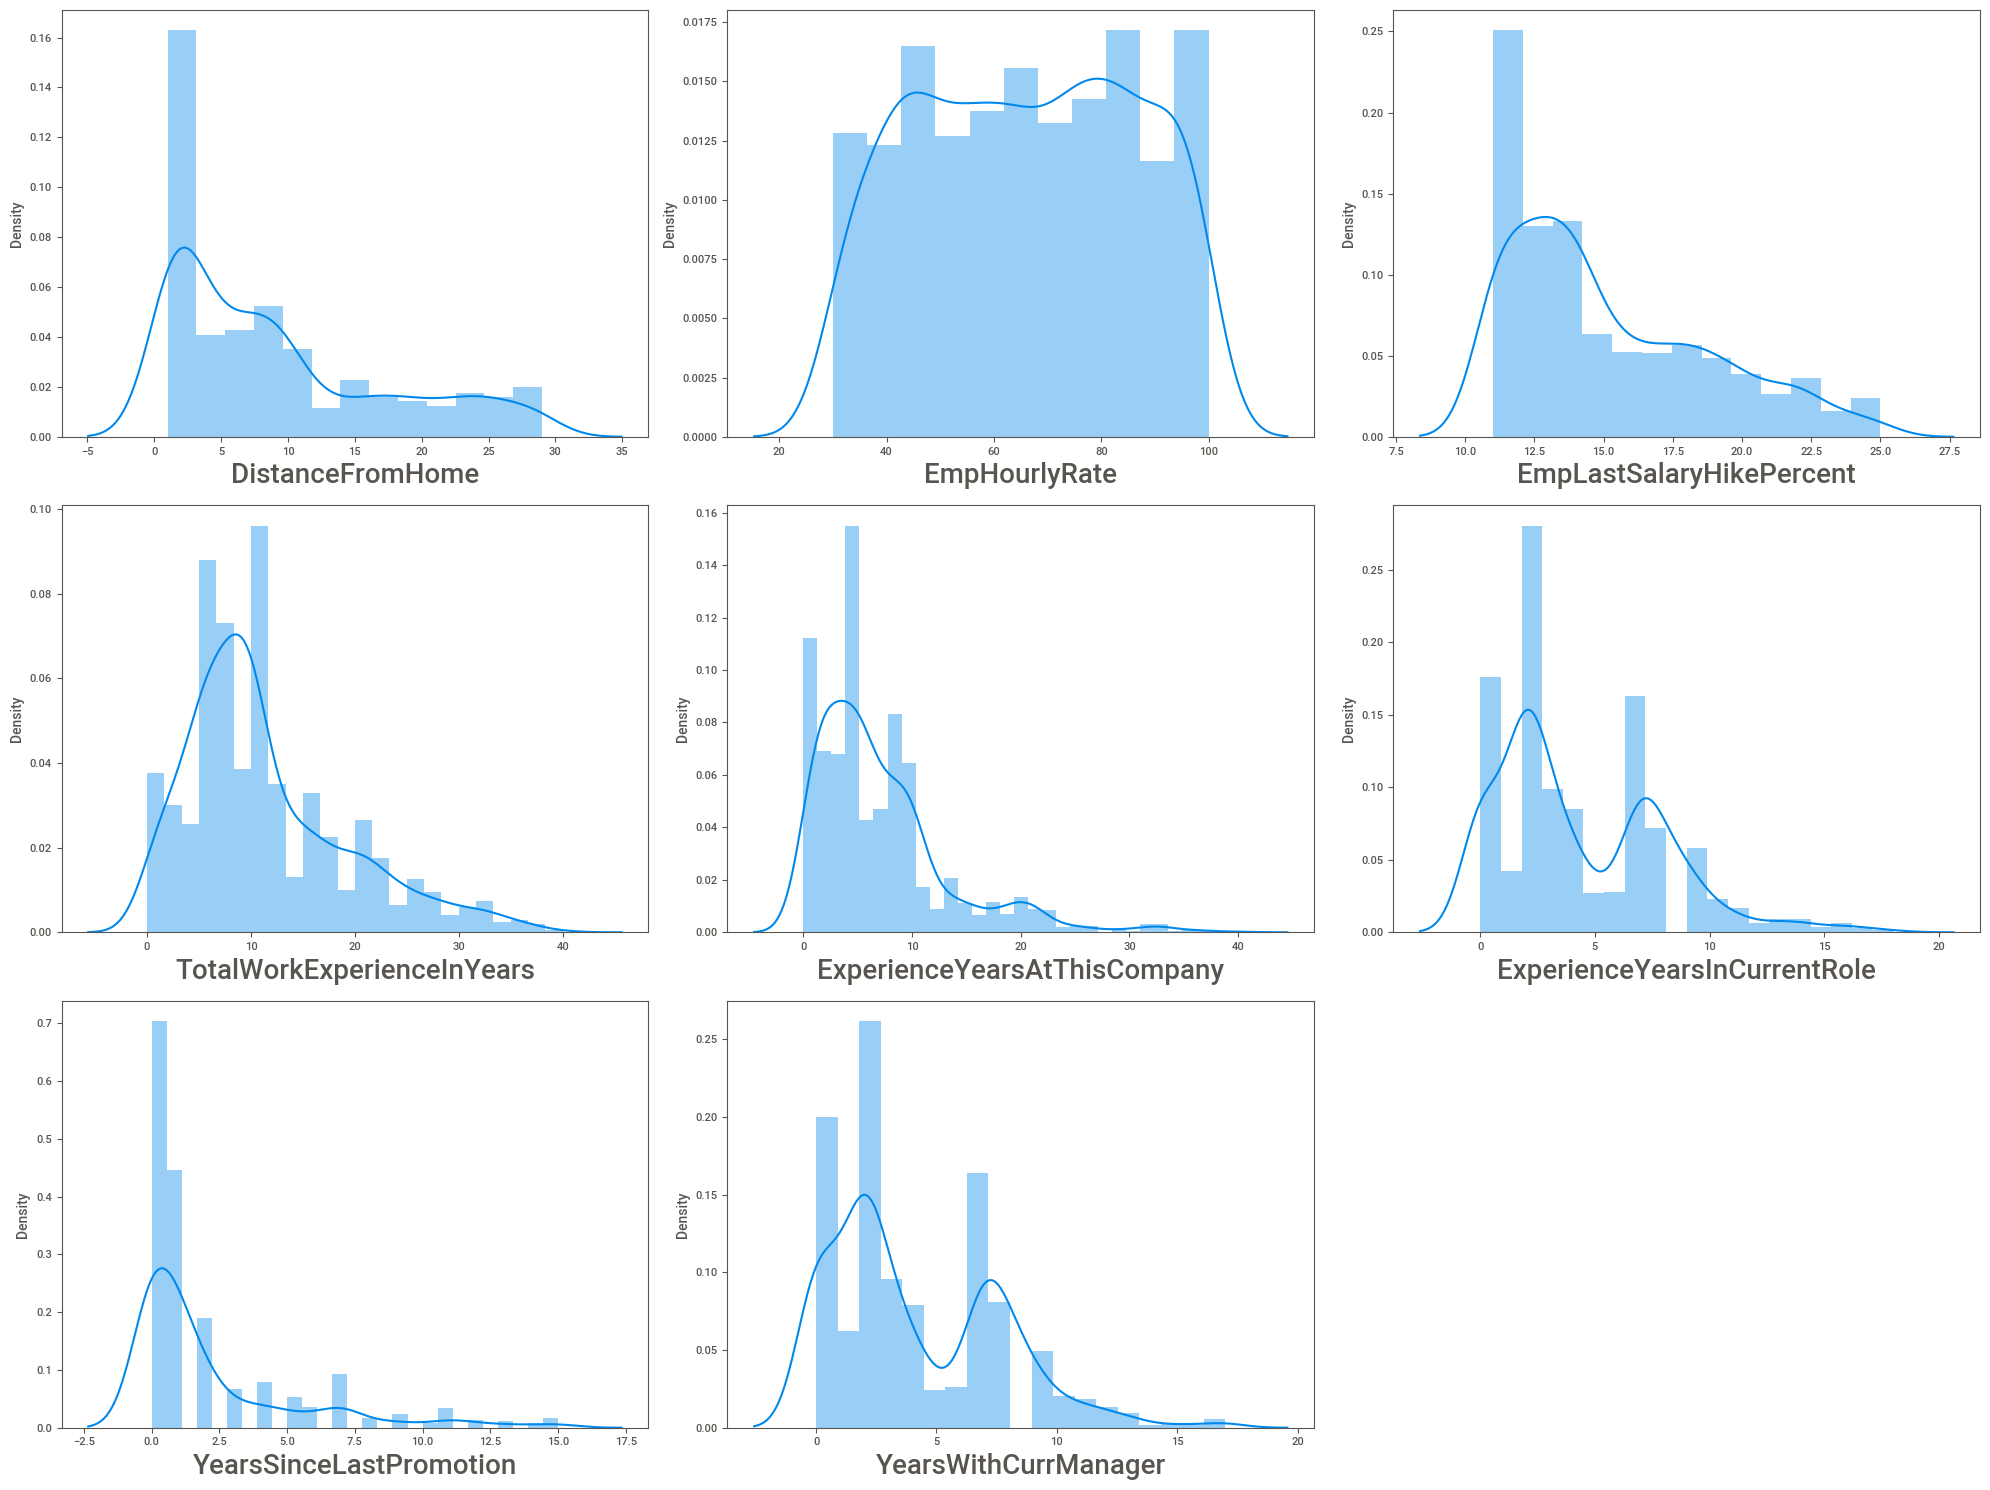

In [37]:
# Make a list of continuous feature in nature
continuous = data[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15)) # defining canvas size
plotno = 1 # counter

for column in continuous: # iteration of columns / acessing the columns from count 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=continuous[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### CHECK THE SKEWNESS

##### Skewness: Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

In [38]:
print('1.Distance From Home Feature Skewness:',data.DistanceFromHome.skew())
print('2.Employee Hourly Rate Feature Skewness:',data.EmpHourlyRate.skew())
print('3.Employee Last Salary Hike Percent Feature Skewness:',data.EmpLastSalaryHikePercent.skew())
print('4.Total Work Experiance In Year Feature Skewness:',data.TotalWorkExperienceInYears.skew())
print('5.Experiance Year At This Company Feature Skewness:',data.ExperienceYearsAtThisCompany.skew())
print('6.Experiance Year In Current Role Feature Skewness:',data.ExperienceYearsInCurrentRole.skew())
print('7.Year Since Last Promotion Feature Skewness:',data.YearsSinceLastPromotion.skew())
print('8.Years With Current Manager Feature Skewness:',data.YearsWithCurrManager.skew())

1.Distance From Home Feature Skewness: 0.9629561160828001
2.Employee Hourly Rate Feature Skewness: -0.035164888157941436
3.Employee Last Salary Hike Percent Feature Skewness: 0.8086536332261228
4.Total Work Experiance In Year Feature Skewness: 1.0868618597364565
5.Experiance Year At This Company Feature Skewness: 1.789054979919473
6.Experiance Year In Current Role Feature Skewness: 0.8881586703270758
7.Year Since Last Promotion Feature Skewness: 1.9749315589155791
8.Years With Current Manager Feature Skewness: 0.8131582957766446


### CHECK THE KURTOSIS

#### Kurtosis: kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.

In [39]:
print('1.Distance From Home Feature kurtosis:',data.DistanceFromHome.kurtosis())
print('2.Employee Hourly Rate Feature kurtosis:',data.EmpHourlyRate.kurtosis())
print('3.Employee Last Salary Hike Percent Feature kurtosis:',data.EmpLastSalaryHikePercent.kurtosis())
print('4.Total Work Experiance In Year Feature kurtosis:',data.TotalWorkExperienceInYears.kurtosis())
print('5.Experiance Year At This Company Feature kurtosis:',data.ExperienceYearsAtThisCompany.kurtosis())
print('6.Experiance Year In Current Role Feature kurtosis:',data.ExperienceYearsInCurrentRole.kurtosis())
print('7.Year Since Last Promotion Feature kurtosis:',data.YearsSinceLastPromotion.kurtosis())
print('8.Years With Current Manager Feature kurtosis:',data.YearsWithCurrManager.kurtosis())

1.Distance From Home Feature kurtosis: -0.24201677636189256
2.Employee Hourly Rate Feature kurtosis: -1.1868905128360532
3.Employee Last Salary Hike Percent Feature kurtosis: -0.29974077544117517
4.Total Work Experiance In Year Feature kurtosis: 0.8056333333819827
5.Experiance Year At This Company Feature kurtosis: 4.057959404441291
6.Experiance Year In Current Role Feature kurtosis: 0.4380286874251209
7.Year Since Last Promotion Feature kurtosis: 3.5390800793468817
8.Years With Current Manager Feature kurtosis: 0.14820164456972984


# Data Preprocessing

#### Checking Mising Values

In [40]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### CONVERT CATEGORICAL TO NUMERICAL

In [41]:
# Get all categorical feature list
list(data.select_dtypes('object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

#### 1.Gender:

In [42]:
# Get value counts of gender
data.Gender.value_counts()

Gender
Male      725
Female    475
Name: count, dtype: int64

In [43]:
# Use mannual encoding to map the labels
data.Gender = data.Gender.map({'Male':1,'Female':0})

#### 2.Education Background

In [44]:
# Get value counts of Education Background
data.EducationBackground.value_counts()

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [45]:
# Use frequency encoding
data.loc[data['EducationBackground']=='Life Sciences','EducationBackground']=5
data.loc[data['EducationBackground']=='Medical','EducationBackground']=4
data.loc[data['EducationBackground']=='Marketing','EducationBackground']=3
data.loc[data['EducationBackground']=='Technical Degree','EducationBackground']=2
data.loc[data['EducationBackground']=='Other','EducationBackground']=1
data.loc[data['EducationBackground']=='Human Resources','EducationBackground']=0


In [46]:
# Checking conversion happen or not
data.EducationBackground.value_counts()

EducationBackground
5    492
4    384
3    137
2    100
1     66
0     21
Name: count, dtype: int64

#### 3.Marital Status

In [47]:
# Get the value counts of marital status
data.MaritalStatus.value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [48]:
# Use mannual encoding
data.MaritalStatus = data.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [49]:
# Check conversion happen or not
data.MaritalStatus.value_counts()

MaritalStatus
2    548
1    384
0    268
Name: count, dtype: int64

#### 4.Employee Department

In [50]:
# Get the value counts of employee department 
data.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [51]:
# Use Frequency encoding
data.loc[data['EmpDepartment']=='Sales','EmpDepartment']=5
data.loc[data['EmpDepartment']=='Development','EmpDepartment']=4
data.loc[data['EmpDepartment']=='Research & Development','EmpDepartment']=3
data.loc[data['EmpDepartment']=='Human Resources','EmpDepartment']=2
data.loc[data['EmpDepartment']=='Finance','EmpDepartment']=1
data.loc[data['EmpDepartment']=='Data Science','EmpDepartment']=0

In [52]:
# Check conversion happen or not
data.EmpDepartment.value_counts()

EmpDepartment
5    373
4    361
3    343
2     54
1     49
0     20
Name: count, dtype: int64

#### 5.Employee Job Role

In [53]:
# Getting the value counts of EmpJobRole
data.EmpJobRole.value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [54]:
# Use frequency encoding because feature contain a lots of label
data.loc[data['EmpJobRole']=='Sales Executive','EmpJobRole']=18
data.loc[data['EmpJobRole']=='Developer','EmpJobRole']=17
data.loc[data['EmpJobRole']=='Manager R&D','EmpJobRole']=16
data.loc[data['EmpJobRole']=='Research Scientist','EmpJobRole']=15
data.loc[data['EmpJobRole']=='Sales Representative','EmpJobRole']=14
data.loc[data['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
data.loc[data['EmpJobRole']=='Senior Developer','EmpJobRole']=12
data.loc[data['EmpJobRole']=='Manager','EmpJobRole']=11
data.loc[data['EmpJobRole']=='Finance Manager','EmpJobRole']=10
data.loc[data['EmpJobRole']=='Human Resources','EmpJobRole']=9
data.loc[data['EmpJobRole']=='Technical Lead','EmpJobRole']=8
data.loc[data['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
data.loc[data['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
data.loc[data['EmpJobRole']=='Data Scientist','EmpJobRole']=5
data.loc[data['EmpJobRole']=='Research Director','EmpJobRole']=4
data.loc[data['EmpJobRole']=='Business Analyst','EmpJobRole']=3
data.loc[data['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
data.loc[data['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
data.loc[data['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [55]:
# Check conversion happen or not
data.EmpJobRole.value_counts()

EmpJobRole
18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: count, dtype: int64

#### 6.Business Travel Frequency:

In [56]:
# Get the value count of buisness travel frequency
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [57]:
# Use mannual encoding Because feature contain minimum label
data.BusinessTravelFrequency = data.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [58]:
# Check conversion happen or not
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
2    846
1    222
0    132
Name: count, dtype: int64

#### 7.Overtime:

In [59]:
# Get the value count of Overtime
data.OverTime.value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [60]:
# Use mannual Encoding
data.OverTime = data.OverTime.map({'No':1,'Yes':0})

In [61]:
# Check conversion happen or not
data.OverTime.value_counts()

OverTime
1    847
0    353
Name: count, dtype: int64

#### 8.Attrition

In [62]:
# Get the value counts of Attrition
data.Attrition.value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

In [63]:
# Use Mannual encoding because feature contain less no of label
data.Attrition = data.Attrition.map({'No':1,'Yes':0})

In [64]:
# Check conversion happen or not
data.Attrition.value_counts()

Attrition
1    1022
0     178
Name: count, dtype: int64

In [65]:
# Check all data features 
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,3,1,5,18,2,10,3,...,4,10,2,2,10,7,0,8,1,3
1,E1001006,47,1,3,1,5,18,2,14,4,...,4,20,2,3,7,7,1,7,1,3
2,E1001007,40,1,5,2,5,18,1,5,4,...,3,20,2,3,18,13,1,12,1,4
3,E1001009,41,1,0,0,2,11,2,10,4,...,2,23,2,2,21,6,12,6,1,3
4,E1001010,60,1,3,1,5,18,2,16,4,...,4,10,1,3,2,2,2,2,1,3


### CHECK OUTLIERS AND IMPUTE OUTLIERS:


##### BoxPlot: Box plots are used to show distributions of numeric data values as well as it helps to detect the outliers.

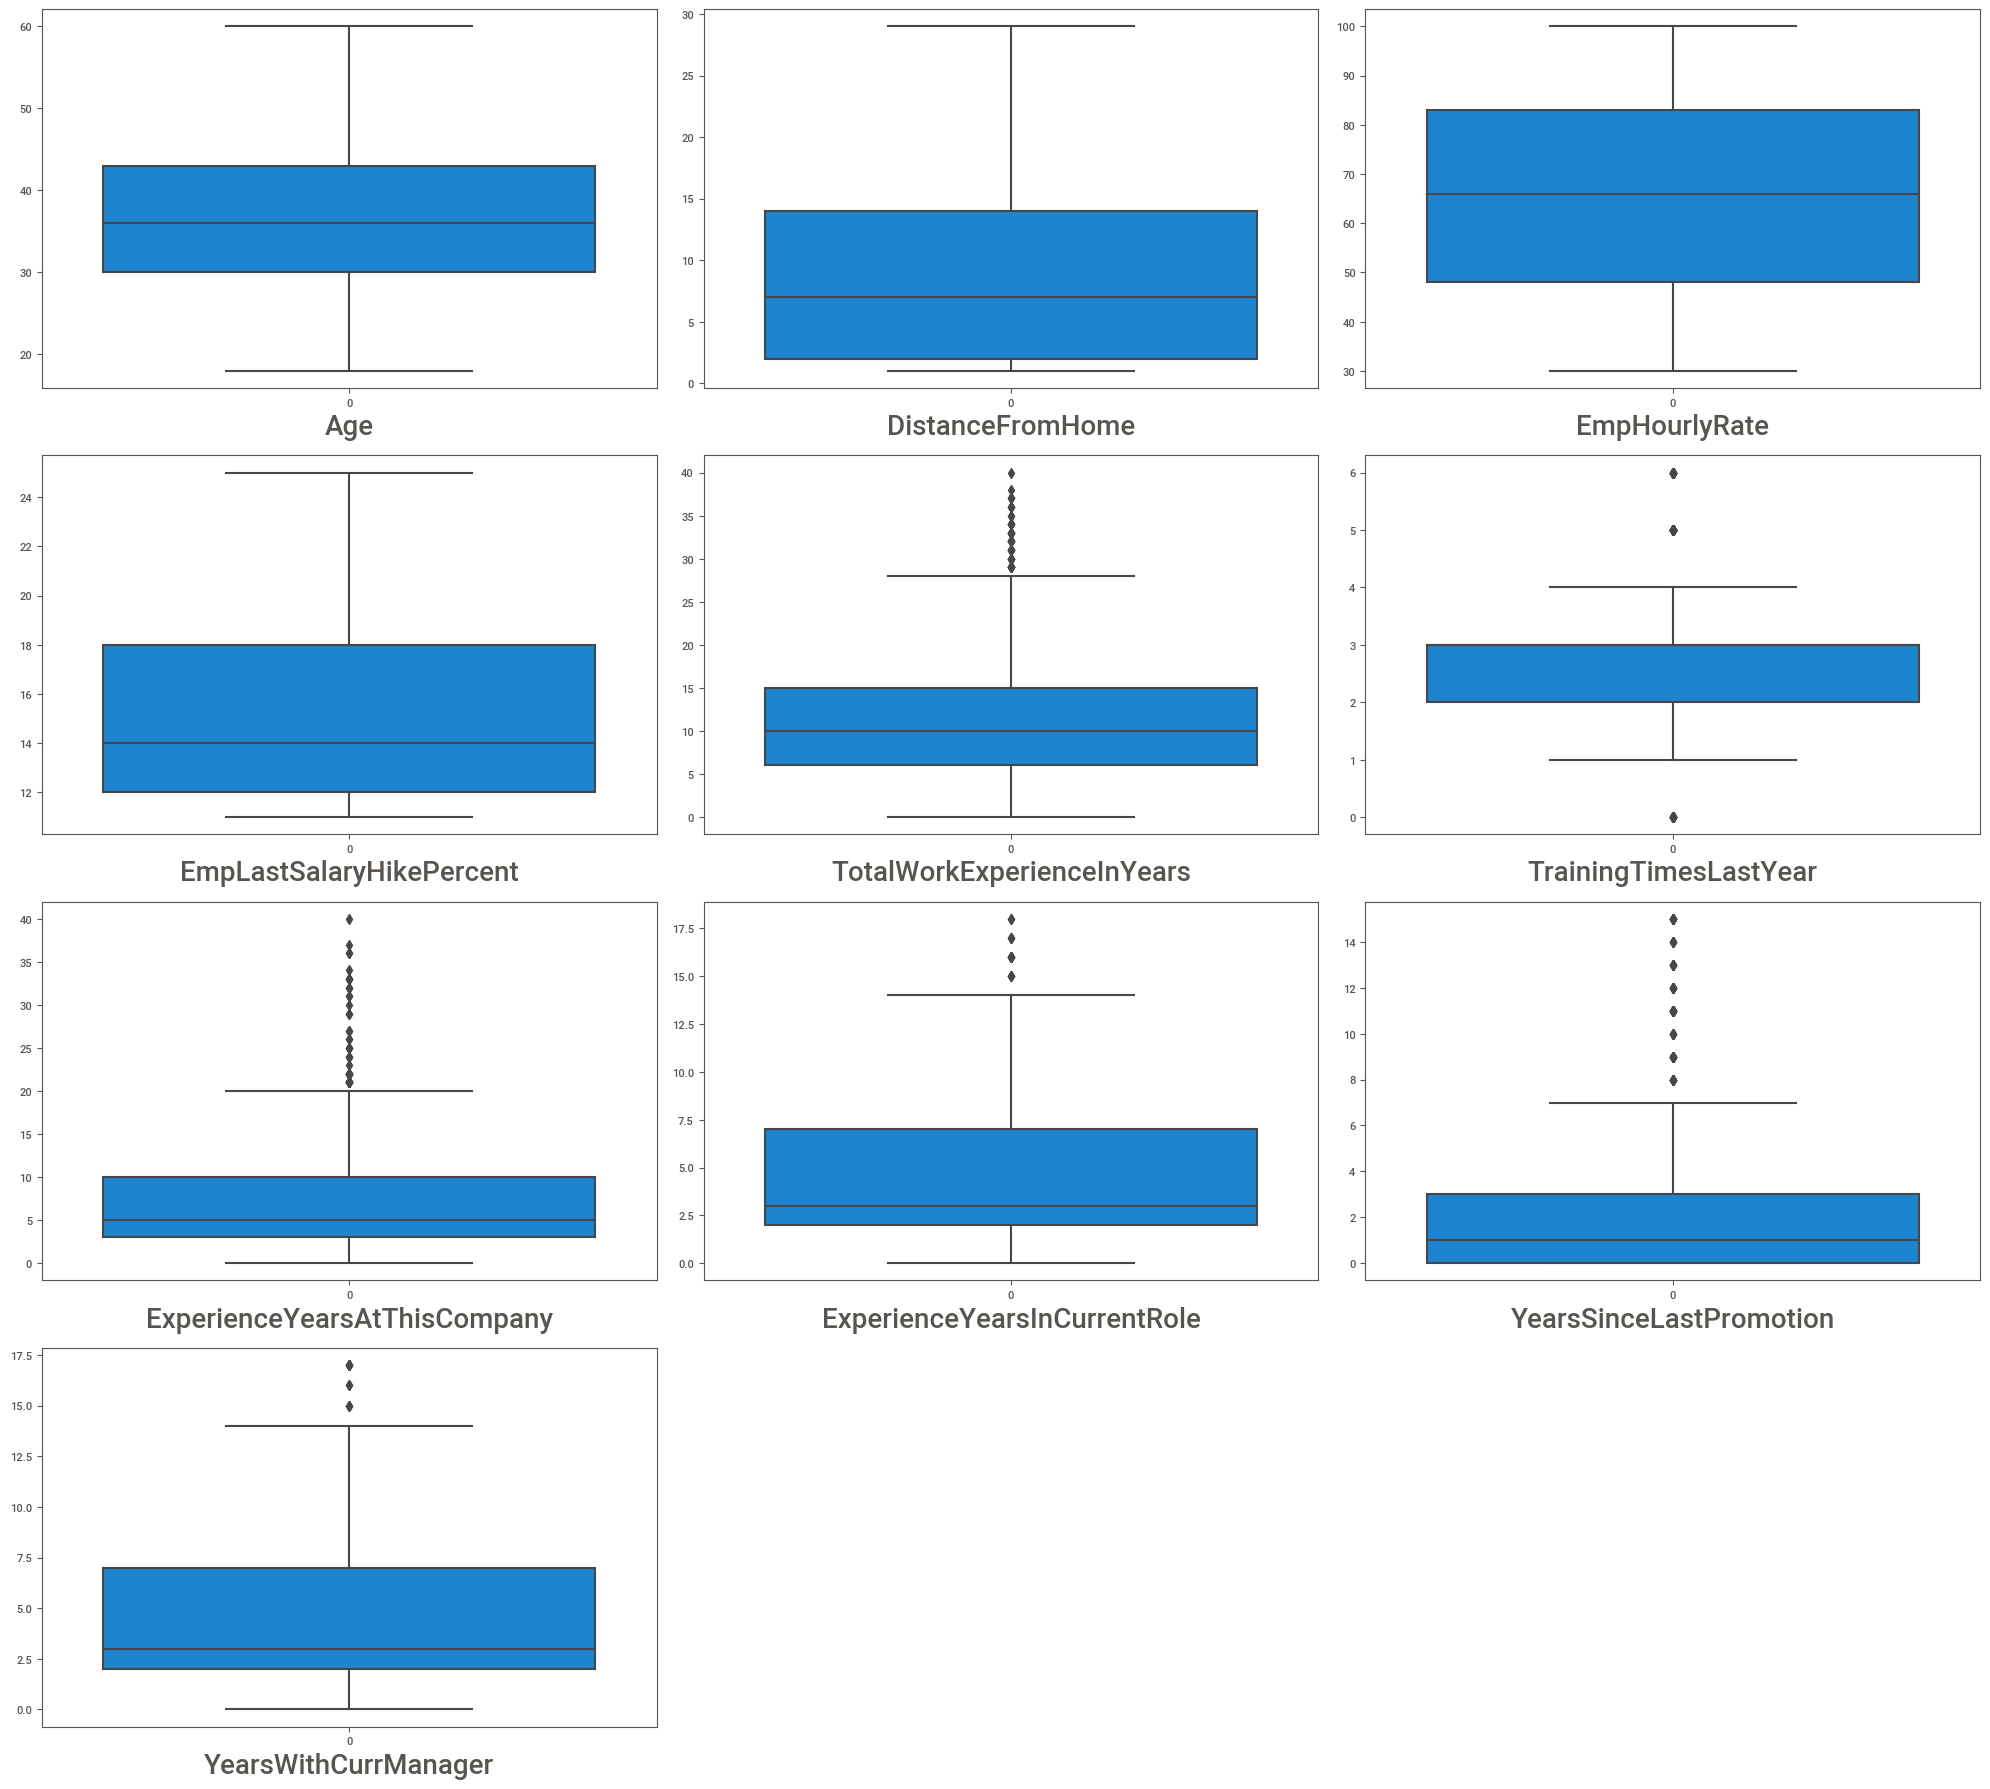

In [66]:
out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

##### 1.Total Work Experiance in year

In [67]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [68]:
# Impute outlier
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()

In [69]:
# filtering data after imputation
data.loc[data['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 2.Training Times Last Year

In [70]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TrainingTimesLastYear'].quantile(0.25)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [71]:
# Impute outlier in max & minmum limit
data.loc[data['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()

In [72]:
# Filtering the min limit
data.loc[data['TrainingTimesLastYear'] < min_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [73]:
# Filtering the max limit
data.loc[data['TrainingTimesLastYear'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 3.Experience Years At This Company

In [74]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [75]:
# Impute outlier
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()

In [76]:
# Filtering the data
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit]


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### 4.Experience Years In Current Role

In [77]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [78]:
# Impute the outlier
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = data['ExperienceYearsInCurrentRole'].median()

In [79]:
# Filtering the data
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 5.Years Since Last Promotion

In [80]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [81]:
# impute outlier
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

In [82]:
# Filtering data
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


##### 6.Years With Current Manager

In [83]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsWithCurrManager'].quantile(0.25)
Q3 = data['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [84]:
# impute outlier
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()

In [85]:
# Filtering the data
data.loc[data['YearsWithCurrManager'] >max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### CHECKING OUTLIER AFTER IMPUTATION

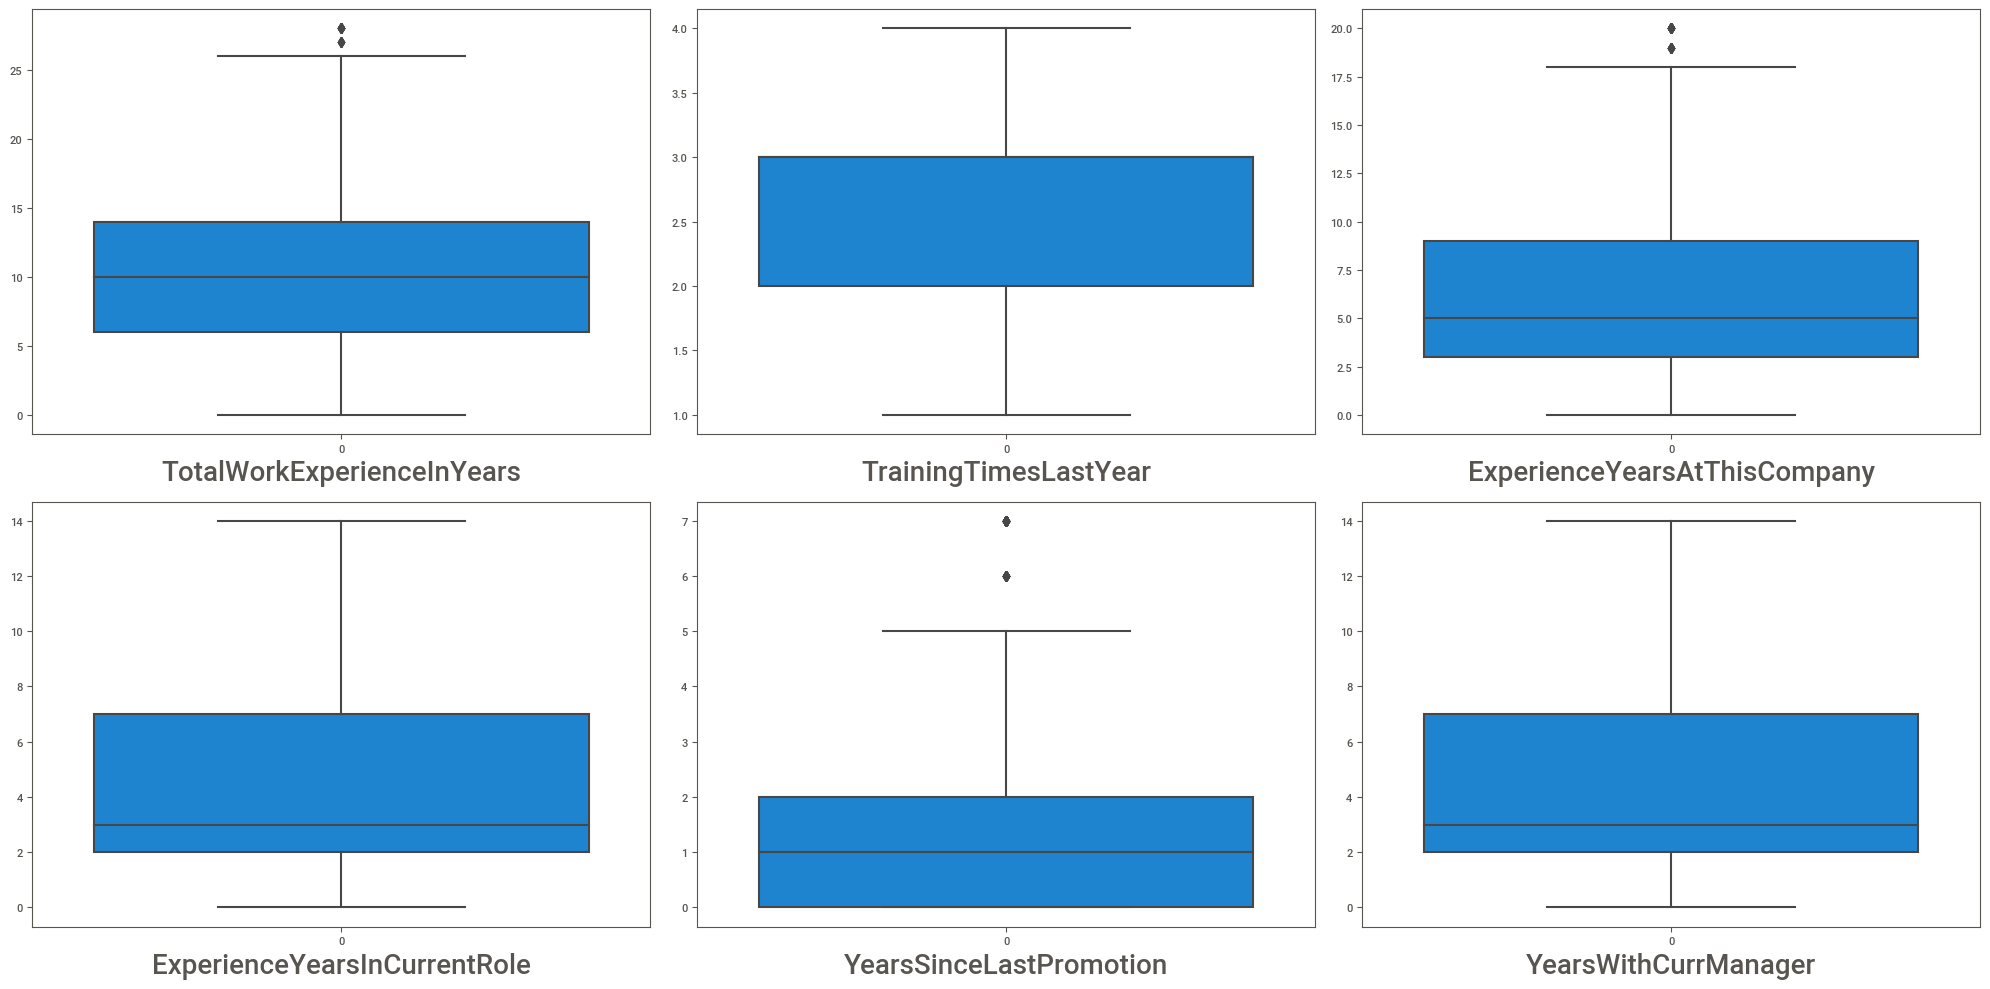

In [86]:
out = data[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(2,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

##### Observation:

Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier.

# SCALING THE DATA

In [87]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']]=scalar.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion']])

In [88]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating',
       'square_YearsSinceLastPromotion'],
      dtype='object')

In [89]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,E1001000,-0.541458,1,3,1,5,18,2,0.102061,3,...,-0.058535,-0.879579,2,0.868276,0.864098,0,1.202103,1,3,-0.756553
1,E1001006,1.109888,1,3,1,5,18,2,0.591464,4,...,1.512870,-0.879579,3,0.200371,0.864098,1,0.902825,1,3,-0.234492
2,E1001007,0.339260,1,5,2,5,18,1,-0.509693,4,...,1.512870,-0.879579,3,2.649355,2.661702,1,2.399219,1,4,-0.234492
3,E1001009,0.449349,1,0,0,2,11,2,0.102061,4,...,1.984292,-0.879579,2,-0.244898,0.564498,1,0.603546,1,3,-0.234492
4,E1001010,2.541054,1,3,1,5,18,2,0.836165,4,...,-0.058535,-2.303999,3,-0.912803,-0.633905,2,-0.593570,1,3,0.287569
